# Demand Forecasting - Use Case 4

Submitted By: **Sharan Sasi**

Email: sharanssi@gmail.com

**Context**
<br>
It is a meal delivery company which operates in multiple cities. They have various fulfillment centers in these cities for dispatching meal orders to their customers. The client wants you to help these centers with demand forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly.

**Content**
<br>
The replenishment of majority of raw materials is done on weekly basis and since the raw material is perishable, the procurement planning is of utmost importance. Secondly, staffing of the centers is also one area wherein accurate demand forecasts are really helpful. Given the following information, the task is to predict the demand for the next 10 weeks (Weeks: 146-155) for the center-meal combinations in the test set

### **Data Dictionary**
<br>

1. **Weekly Demand data (train.csv): Contains the historical demand data for all centers, test.csv contains all the following features except the target variable.**
<br>

**Variable Definition**

**id:** Unique ID

**week**: Week No

**center_id**: Unique ID for fulfillment center

**meal_id**: Unique ID for Meal

**checkout_price**: Final price including discount, taxes & delivery charges

**base_price**: Base price of the meal

**emailer_for_promotion**: Emailer sent for promotion of meal

**homepage_featured**: Meal featured at homepage

**num_orders**: (Target) Orders Count
<br>

2. **fulfilment_center_info.csv: Contains information for each fulfilment center**

**Variable Definition**

**center_id**: Unique ID for fulfillment center

**city_code**: Unique code for city

**region_code**: Unique code for region

**center_type**: Anonymized center type

**op_area**: Area of operation (in km^2)


3. **meal_info.csv: Contains information for each meal being served**

**Variable Definition**

**meal_id**: Unique ID for the meal

**category**: Type of meal (beverages/snacks/soups….)

**cuisine**: Meal cuisine (Indian/Italian/…)

Level of Forecasting: Center id x meal id x week

### Importing Libraries

In [2]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
)

from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# To tune different models (if needed)
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()


### Import Dataset

In [3]:
# Train dataset.

train_data = pd.read_csv("train.csv")
print("###### Train dataset has {} rows and {} columns #######".format(train_data.shape[0], train_data.shape[1]))
train_data.head()

###### Train dataset has 456548 rows and 9 columns #######


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
# Meal dataset.

meal_info_data = pd.read_csv("meal_info.csv")
print("###### Meal dataset has {} rows and {} columns #######".format(meal_info_data.shape[0], meal_info_data.shape[1]))
meal_info_data.head()

###### Meal dataset has 51 rows and 3 columns #######


,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [5]:
# Fullfilment dataset.

fulfilment_center_info_data = pd.read_csv("fulfilment_center_info.csv")
print("###### Center info has {} rows and {} columns #######".format(fulfilment_center_info_data.shape[0], fulfilment_center_info_data.shape[1]))
fulfilment_center_info_data.head()

###### Center info has 77 rows and 5 columns #######


,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [6]:
# Test dataset.

test_data = pd.read_csv("test.csv")
print("###### Test dataset has {} rows and {} columns #######".format(test_data.shape[0], test_data.shape[1]))
test_data.head()

###### Test dataset has 32573 rows and 8 columns #######


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


Before merging let's check for null values inside the dataset

In [7]:
# Training dataset
train_data.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

No nulls in train data

In [8]:
# Meal info dataset
meal_info_data.isnull().sum()

meal_id     0
category    0
cuisine     0
dtype: int64

No null in meal info dataset

In [9]:
# fulfilment dataset
fulfilment_center_info_data.isnull().sum()

center_id      0
city_code      0
region_code    0
center_type    0
op_area        0
dtype: int64

No null in fullfillment data

In [10]:
# test dataset
test_data.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
dtype: int64

No nulls in test data

### Merging Datasets

Merging with train dataset

In [11]:
# Before merging making sure all key columns are of same data type
train_data['meal_id'] = train_data['meal_id'].astype(int)
train_data['center_id'] = train_data['center_id'].astype(int)

# Merging all datasets

first_join = train_data.merge(meal_info_data, on="meal_id", how="inner")
full_train_data = first_join.merge(fulfilment_center_info_data, on="center_id", how="inner")
print(full_train_data.shape)
full_train_data.head()

(456548, 15)


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


### Our Dataset is ready!!
View the first and last 5 rows of the dataset

In [12]:
full_train_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [13]:
full_train_data.tail()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
456543,1437396,141,61,2104,583.03,630.53,0,1,13,Fish,Continental,473,77,TYPE_A,4.5
456544,1060716,142,61,2104,581.03,582.03,0,0,42,Fish,Continental,473,77,TYPE_A,4.5
456545,1029231,143,61,2104,583.03,581.03,0,0,40,Fish,Continental,473,77,TYPE_A,4.5
456546,1141147,144,61,2104,582.03,581.03,0,0,53,Fish,Continental,473,77,TYPE_A,4.5
456547,1443704,145,61,2104,581.03,582.03,0,0,27,Fish,Continental,473,77,TYPE_A,4.5


### Understand the shape of the dataset

In [14]:
print(f"There are {full_train_data.shape[0]} rows and {full_train_data.shape[1]} columns.")

There are 456548 rows and 15 columns.


### Check the data types of the columns for the dataset

In [15]:
full_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   category               456548 non-null  object 
 10  cuisine                456548 non-null  object 
 11  city_code              456548 non-null  int64  
 12  region_code            456548 non-null  int64  
 13  center_type            456548 non-null  object 
 14  op_area                456548 non-nu

All data-type looks fine to me

In [16]:
# checking for duplicate values
full_train_data.duplicated().sum()

0

No duplicate values inside the dataset

In [17]:
## checking missing values again in the merged dataset
full_train_data.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

Taking a copy of full dataset

In [18]:
data = full_train_data.copy()

Merging with test dataset

In [19]:
# Before merging making sure all key columns are of same data type
test_data['meal_id'] = test_data['meal_id'].astype(int)
test_data['center_id'] = test_data['center_id'].astype(int)

# Merging all datasets

first_join = test_data.merge(meal_info_data, on="meal_id", how="inner")
full_test_data = first_join.merge(fulfilment_center_info_data, on="center_id", how="inner")
print(full_test_data.shape)
full_test_data.head()

(32573, 14)


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
1,1262649,147,55,1885,159.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
2,1453211,149,55,1885,157.14,158.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
3,1262599,150,55,1885,159.14,157.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
4,1495848,151,55,1885,160.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0


In [20]:
## checking missing values in the test dataset
full_test_data.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
category                 0
cuisine                  0
city_code                0
region_code              0
center_type              0
op_area                  0
dtype: int64

No null in test data

Checking datatype of test data

In [21]:
full_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
 8   category               32573 non-null  object 
 9   cuisine                32573 non-null  object 
 10  city_code              32573 non-null  int64  
 11  region_code            32573 non-null  int64  
 12  center_type            32573 non-null  object 
 13  op_area                32573 non-null  float64
dtypes: float64(3), int64(8), object(3)
memory usage: 3.7+ 

Same datatype as in train data

### Exploratory Data Analysis

**Let's check the statistical summary of the data.**

In [22]:
full_train_data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,456548.0,NaN,NaN,NaN,1250096.305633,144354.822378,1000000.0,1124998.75,1250183.5,1375140.25,1499999.0
week,456548.0,NaN,NaN,NaN,74.768771,41.524956,1.0,39.0,76.0,111.0,145.0
center_id,456548.0,NaN,NaN,NaN,82.105796,45.975046,10.0,43.0,76.0,110.0,186.0
meal_id,456548.0,NaN,NaN,NaN,2024.337458,547.42092,1062.0,1558.0,1993.0,2539.0,2956.0
checkout_price,456548.0,NaN,NaN,NaN,332.238933,152.939723,2.97,228.95,296.82,445.23,866.27
base_price,456548.0,NaN,NaN,NaN,354.156627,160.715914,55.35,243.5,310.46,458.87,866.27
emailer_for_promotion,456548.0,NaN,NaN,NaN,0.081152,0.273069,0.0,0.0,0.0,0.0,1.0
homepage_featured,456548.0,NaN,NaN,NaN,0.1092,0.31189,0.0,0.0,0.0,0.0,1.0
num_orders,456548.0,NaN,NaN,NaN,261.87276,395.922798,13.0,54.0,136.0,324.0,24299.0
category,456548,14,Beverages,127890,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observation:
* There are 14 Different food categories in the dataset. Among the food categories, Beverages has the highest number of orders
* There are 4 different cuisines in the dataset, with Italian cuisine as the highest ordered one
* Centers are divided into 3 categories, Type A, B and C, We have more type A centers in the dataset
* Approx 260 is the average orders per week, there are some week it gone upto 24k orders per week

**Let's check the count of each unique category in each of the categorical variables.**

In [23]:
# Making a list of all catrgorical variables
cat_col = list(full_train_data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(full_train_data[column].value_counts())
    print("-" * 50)

Beverages       127890
Rice Bowl        33408
Sandwich         33291
Pizza            33138
Starters         29941
Other Snacks     29379
Desert           29294
Salad            28559
Pasta            27694
Seafood          26916
Biryani          20614
Extras           13562
Soup             12675
Fish             10187
Name: category, dtype: int64
--------------------------------------------------
Italian        122925
Thai           118216
Indian         112612
Continental    102795
Name: cuisine, dtype: int64
--------------------------------------------------
TYPE_A    262881
TYPE_C     99593
TYPE_B     94074
Name: center_type, dtype: int64
--------------------------------------------------


Observation:
* Beverages is the highest ordered category in the dataset, it is ordered 4 times than the next ordered category, which is rice bowl
* No of orders of each cuisines are somewhat equal with Italian cuisines ordered more, the second most ordered cuisine is Thai
* 50% of order in the dataset is from type A center

Check for unique counts in emailer for promotion and homepage featured columns

In [24]:
# Printing number of count of each unique value in the selected columns
print(full_train_data['emailer_for_promotion'].value_counts())
print("-" * 50)
print(full_train_data['homepage_featured'].value_counts())
print("-" * 50)

0    419498
1     37050
Name: emailer_for_promotion, dtype: int64
--------------------------------------------------
0    406693
1     49855
Name: homepage_featured, dtype: int64
--------------------------------------------------


Only 10% of data has promotion and homepage featured in the data

In [25]:
# Checking no of cities in the dataset
print(full_train_data['city_code'].nunique())

51


In [26]:
# Checking no of regions in the dataset
print(full_train_data['region_code'].nunique())

8


### Univariate Analysis

In [27]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

Check-out price

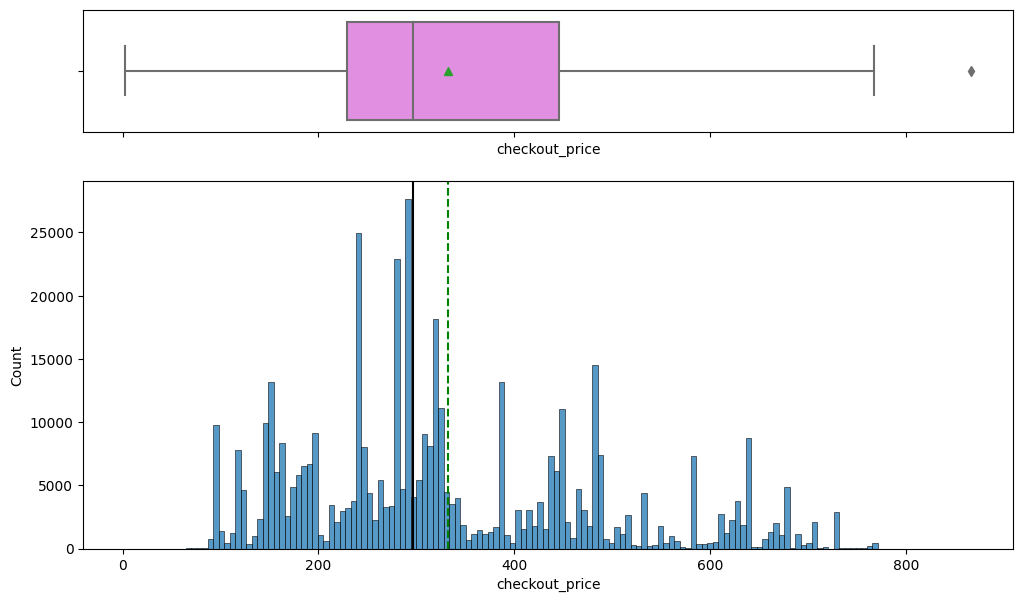

In [28]:
histogram_boxplot(full_train_data, "checkout_price")

Observation: Mean check-out price is 300 and the distribution is little right skewed

Base Price

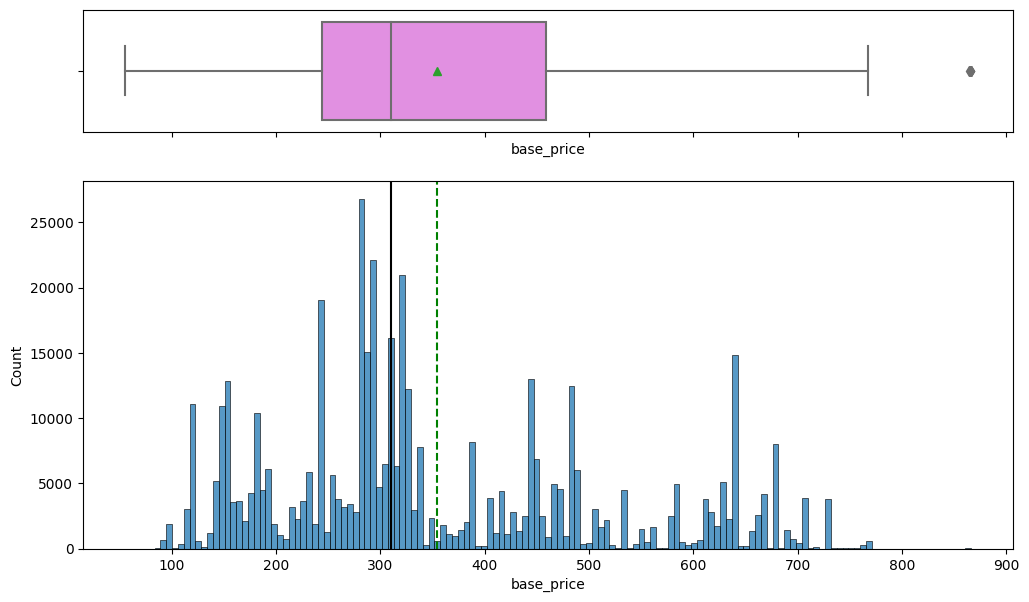

In [29]:
histogram_boxplot(full_train_data, "base_price")

Observation: Base Price also follow a similar pattern as Checkout price, with mean price at 300 and little right skewed

Operational Area

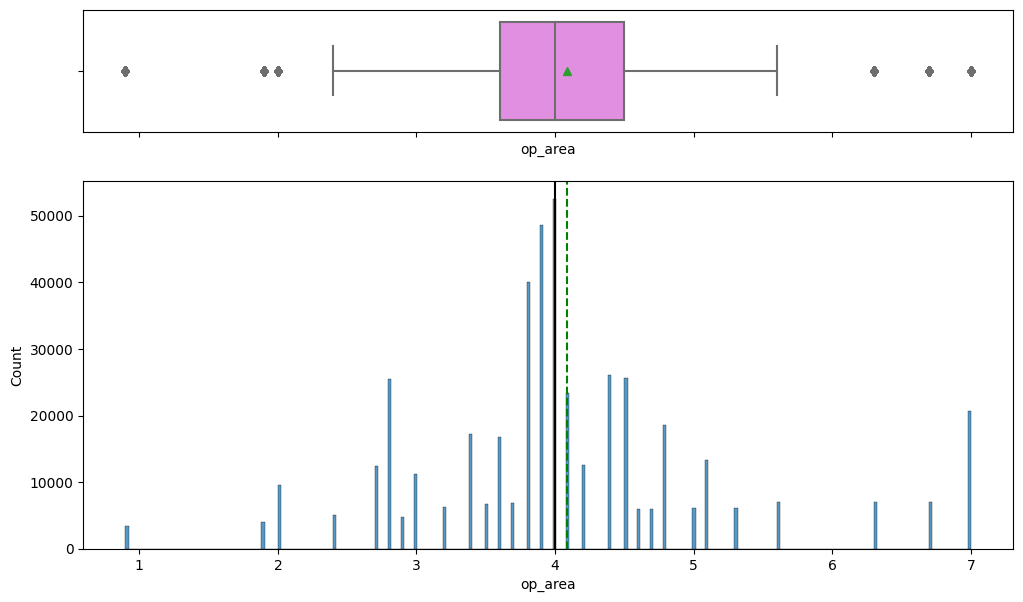

In [30]:
histogram_boxplot(full_train_data, "op_area")

Observation: Operating area is the area of operation of each centers. Average area of operation is 4 sqkm. 

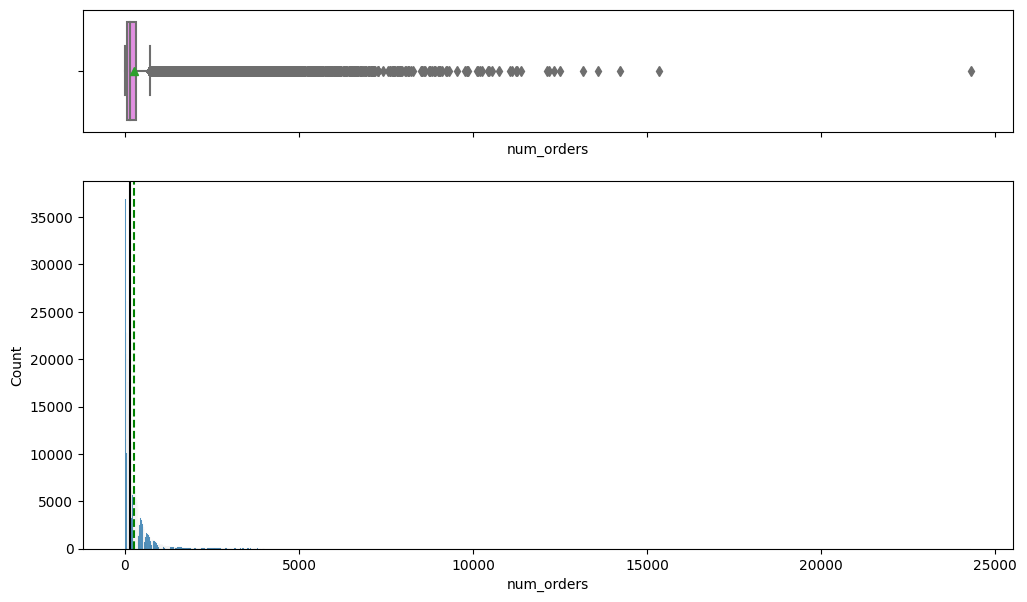

In [31]:
histogram_boxplot(full_train_data, "num_orders")

In [34]:
## checking no of unique city in the dataset
full_train_data['city_code'].nunique()

51

In [35]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

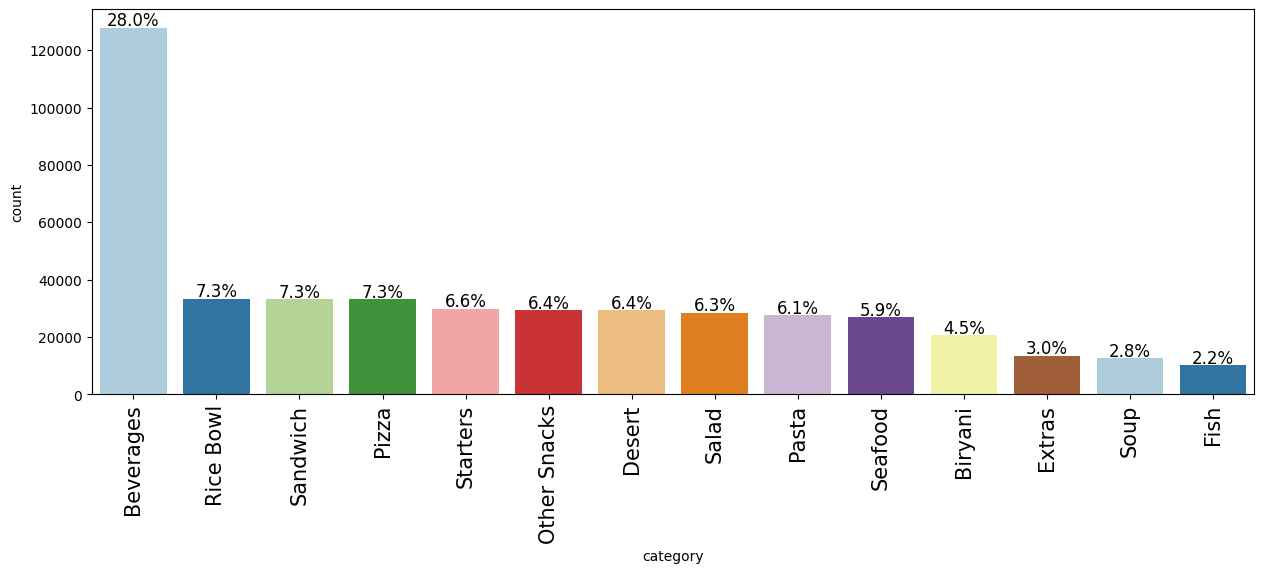

In [36]:
labeled_barplot(full_train_data, "category", perc=True)

Observation: Beverages has the highest number of distribution, followed by ricebowl and sandwich. Least count is for Soup and Fish Category

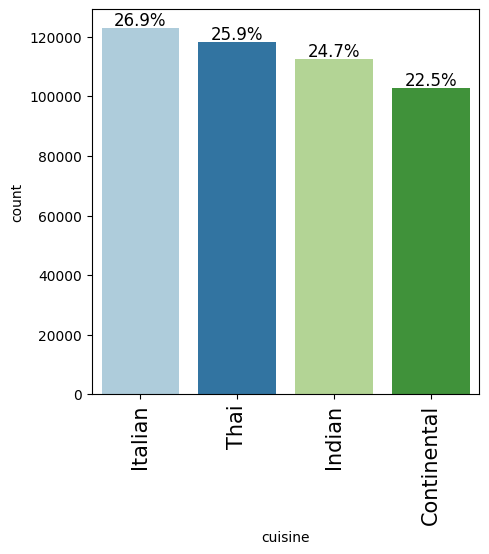

In [37]:
labeled_barplot(full_train_data, "cuisine", perc=True)

Observation: Distribution of cuisines are somewhat equally split. With Italian having more frequency of orders

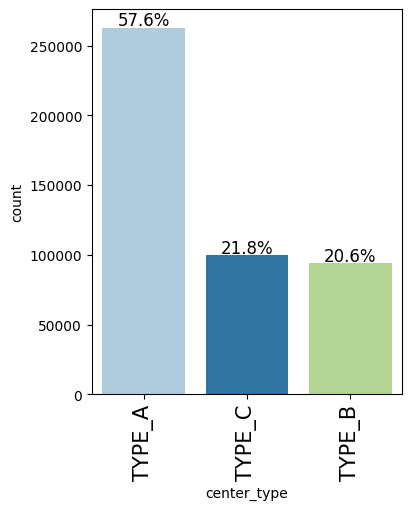

In [38]:
labeled_barplot(full_train_data, "center_type", perc=True)

Observation: Most number of datapoints is from Type A center. Which also mean most of the centers are in Type A 

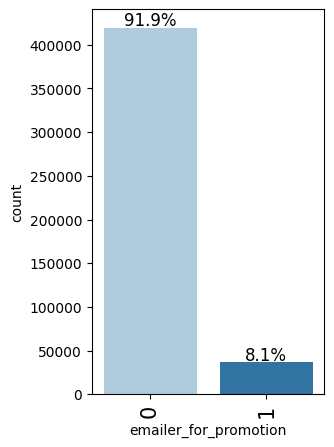

In [39]:
labeled_barplot(full_train_data, "emailer_for_promotion", perc=True)

Observation: Email promotions for meals is done around 8%. 

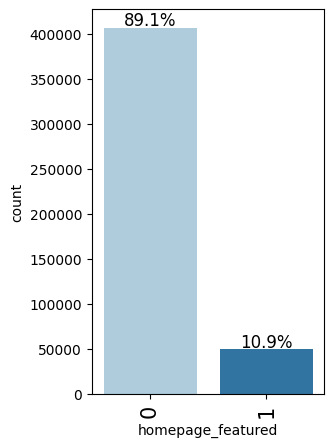

In [40]:
labeled_barplot(full_train_data, "homepage_featured", perc=True)

Observation: Around 11% meal has featured in the homepage

### Bivariate Analysis

Correlation Plot

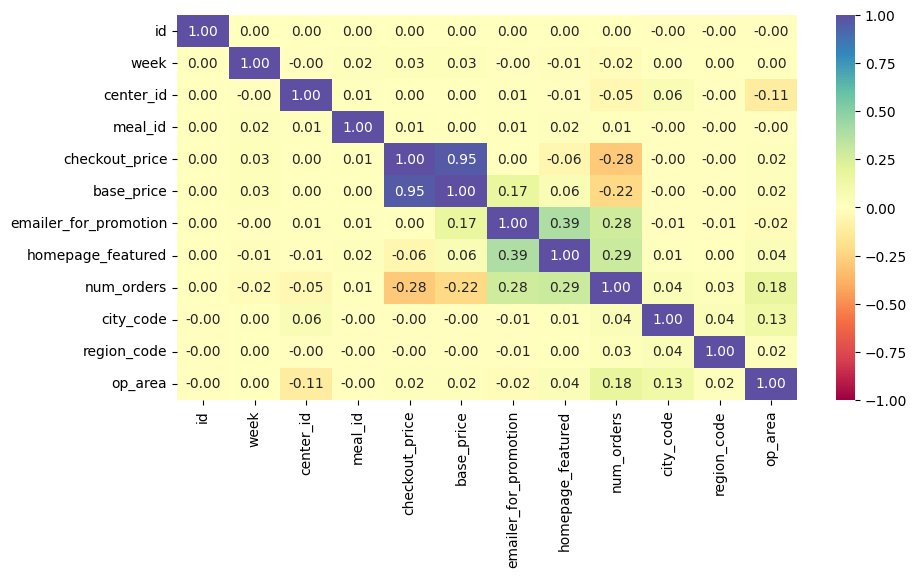

In [41]:
# Correlation plot
cols_list = full_train_data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    full_train_data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Observation
* Base Price is highly correlated with checkout price (95%), so we will drop one of the variable
* Very less correlation among other features

Base price vs Checkout Price

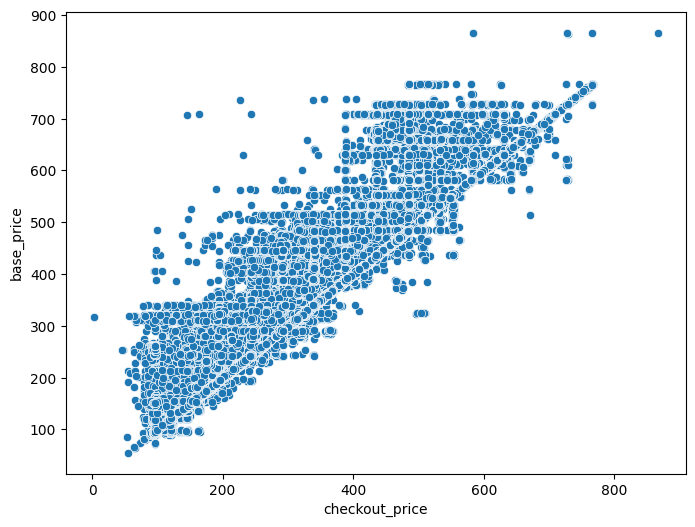

In [42]:
# Scatter plot base price vs checkout price
plt.figure(figsize=[8, 6])
sns.scatterplot(x=full_train_data.checkout_price, y=full_train_data.base_price)
plt.show()

Observation: We can see from the scatterplot that Checkout price and base price are linearly correlated

#### Lets check relationship of independent variable with Dependent variable

Cuisine vs Num of Orders

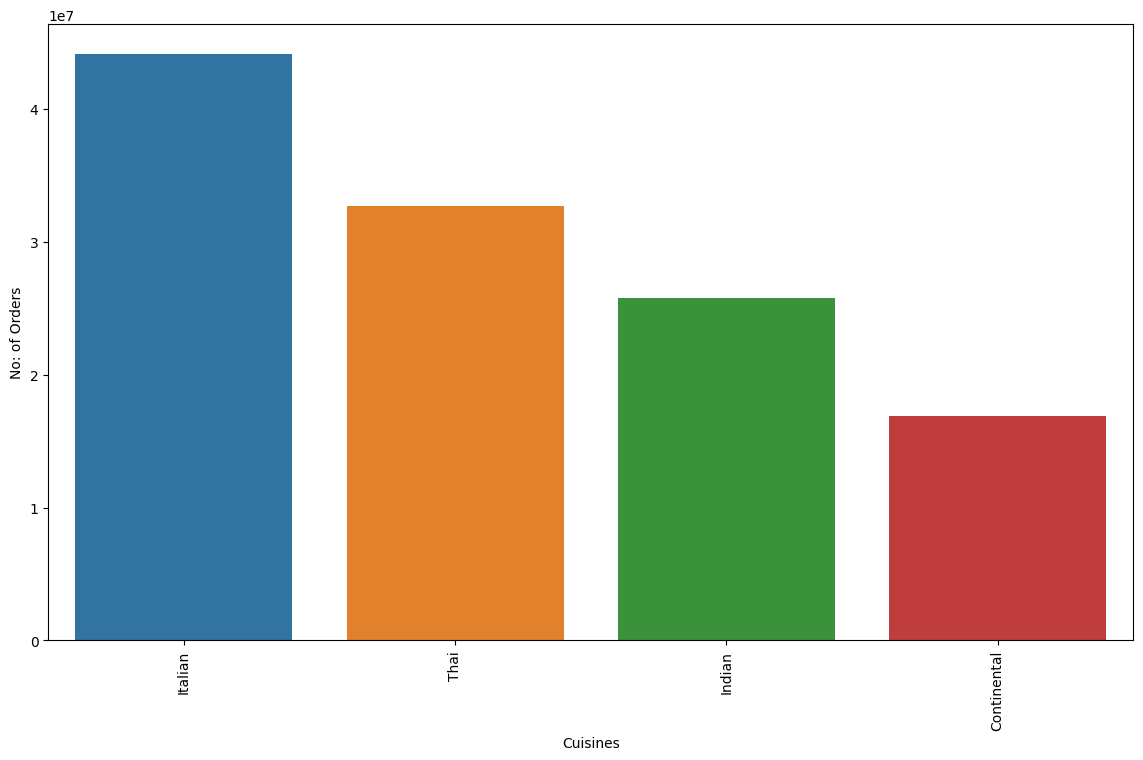

In [43]:
df_revenue1 = full_train_data.groupby(["cuisine"], as_index=False)[
    "num_orders"
].sum()
plot_order = full_train_data.groupby('cuisine')['num_orders'].sum().sort_values(ascending=False).index.values
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
a = sns.barplot(x=df_revenue1.cuisine, y=df_revenue1.num_orders, order=plot_order)
a.set_xlabel("Cuisines")
a.set_ylabel("No: of Orders")
plt.show()

Observation: More number of orders is for Italian followed by Thai

Category vs Num of orders

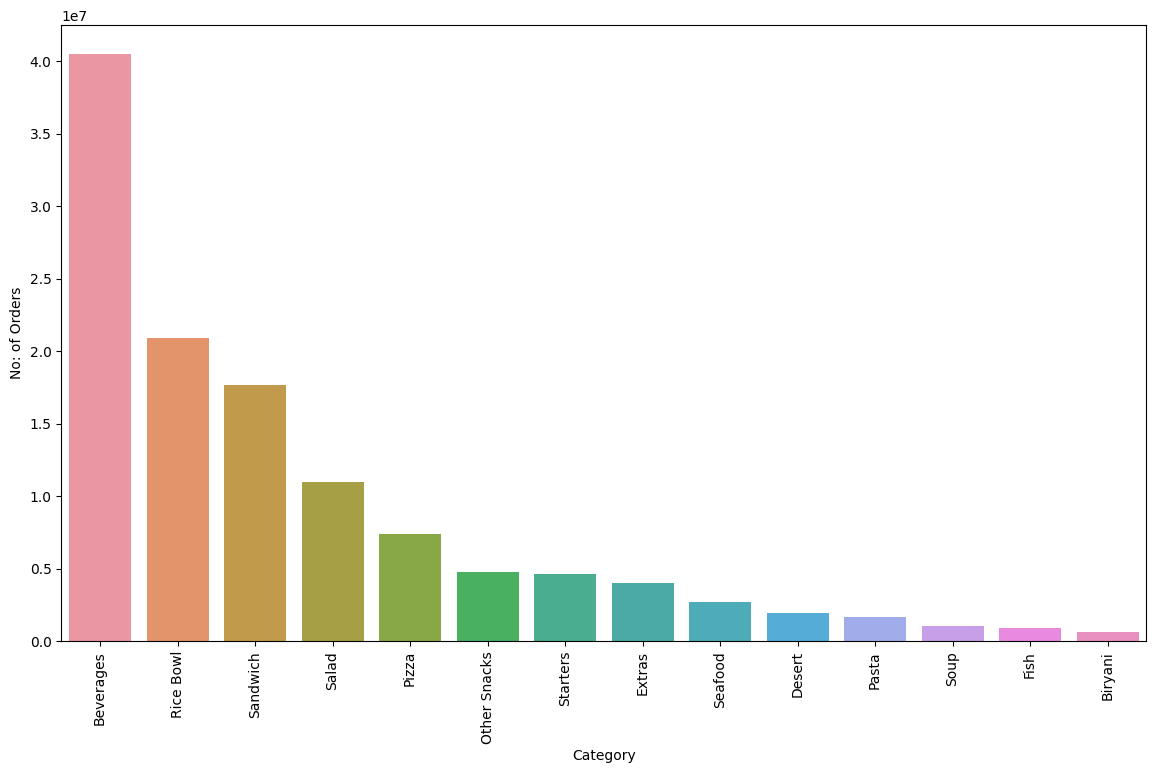

In [44]:
df_revenue1 = full_train_data.groupby(["category"], as_index=False)[
    "num_orders"
].sum()
plot_order = full_train_data.groupby('category')['num_orders'].sum().sort_values(ascending=False).index.values
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
a = sns.barplot(x=df_revenue1.category, y=df_revenue1.num_orders, order=plot_order)
a.set_xlabel("Category")
a.set_ylabel("No: of Orders")
plt.show()

Observation: More orders is for Beverages category, then followed by Rice bowl. Least order is for Fish and Biriyani

Center type vs Num of orders

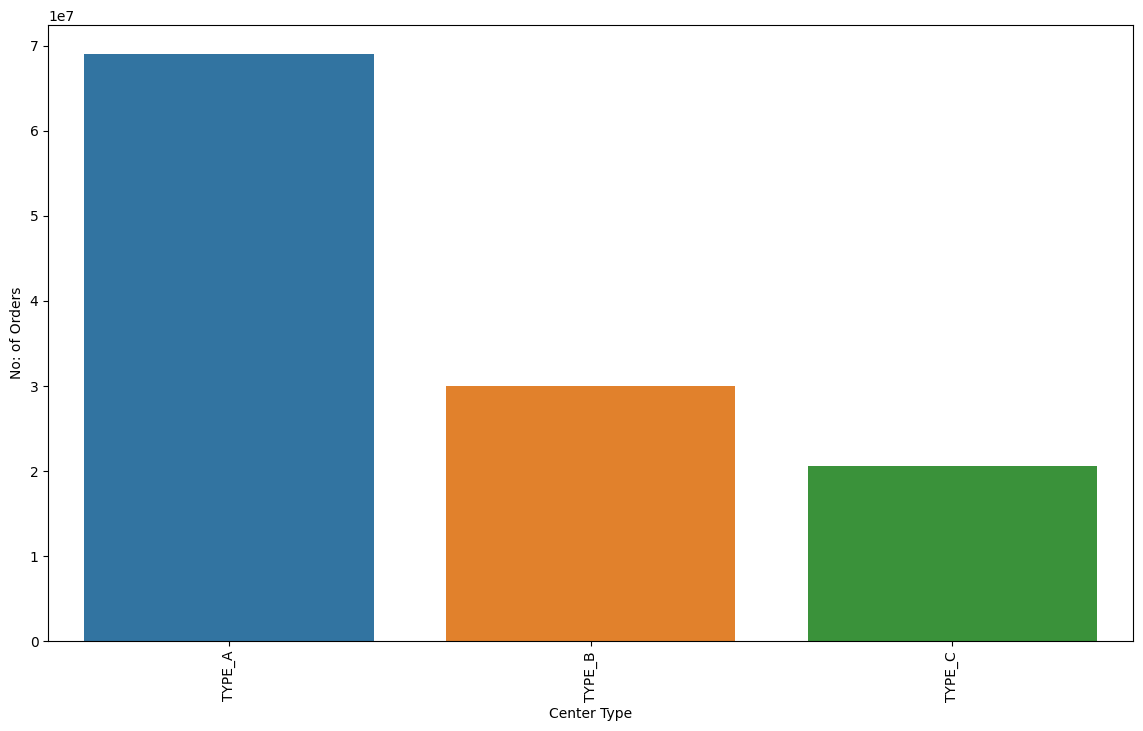

In [46]:
df_revenue1 = full_train_data.groupby(["center_type"], as_index=False)[
    "num_orders"
].sum()
plot_order = full_train_data.groupby('center_type')['num_orders'].sum().sort_values(ascending=False).index.values
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
a = sns.barplot(x=df_revenue1.center_type, y=df_revenue1.num_orders, order=plot_order)
a.set_xlabel("Center Type")
a.set_ylabel("No: of Orders")
plt.show()

Observation: More number of orders is from Type A center

**Let's check the distribution of our target variable i.e num_orders with the other categorical columns**

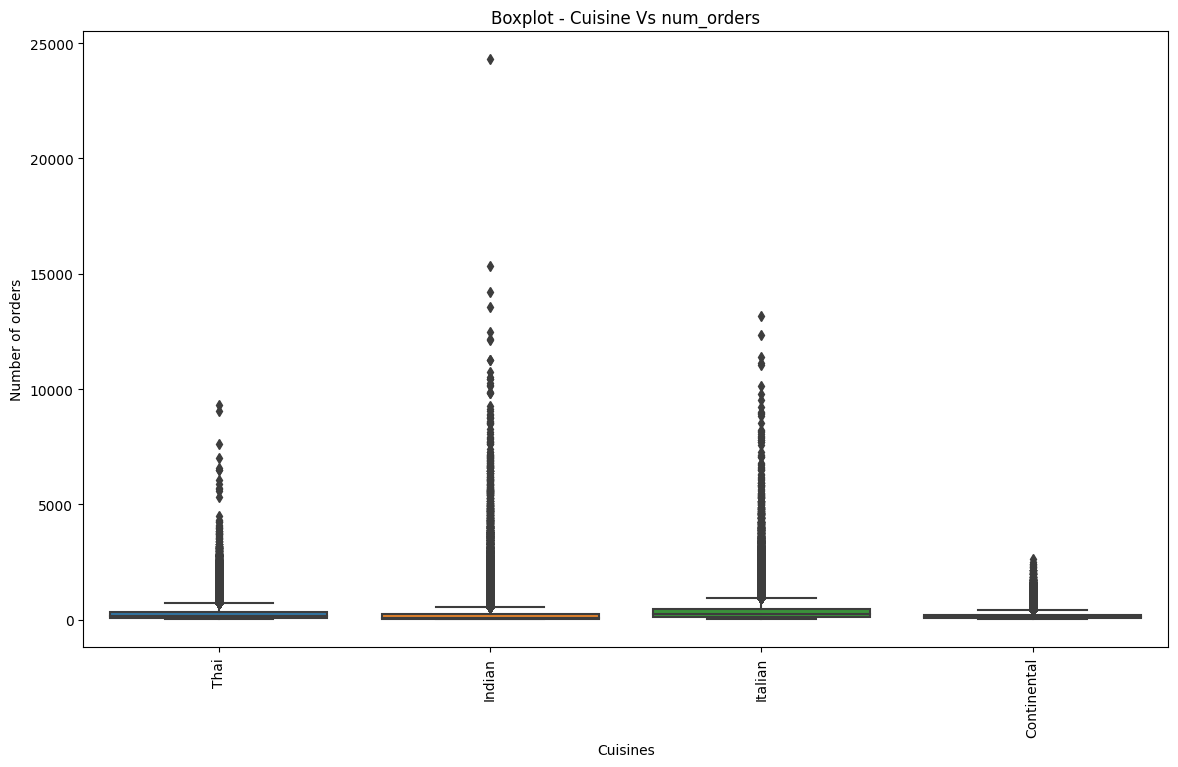

In [188]:
plt.figure(figsize=[14, 8])
sns.boxplot(x= full_train_data.cuisine,y= full_train_data.num_orders)
plt.xticks(rotation=90)
plt.title("Boxplot - Cuisine Vs num_orders")
plt.xlabel("Cuisines")
plt.ylabel("Number of orders")
plt.show()

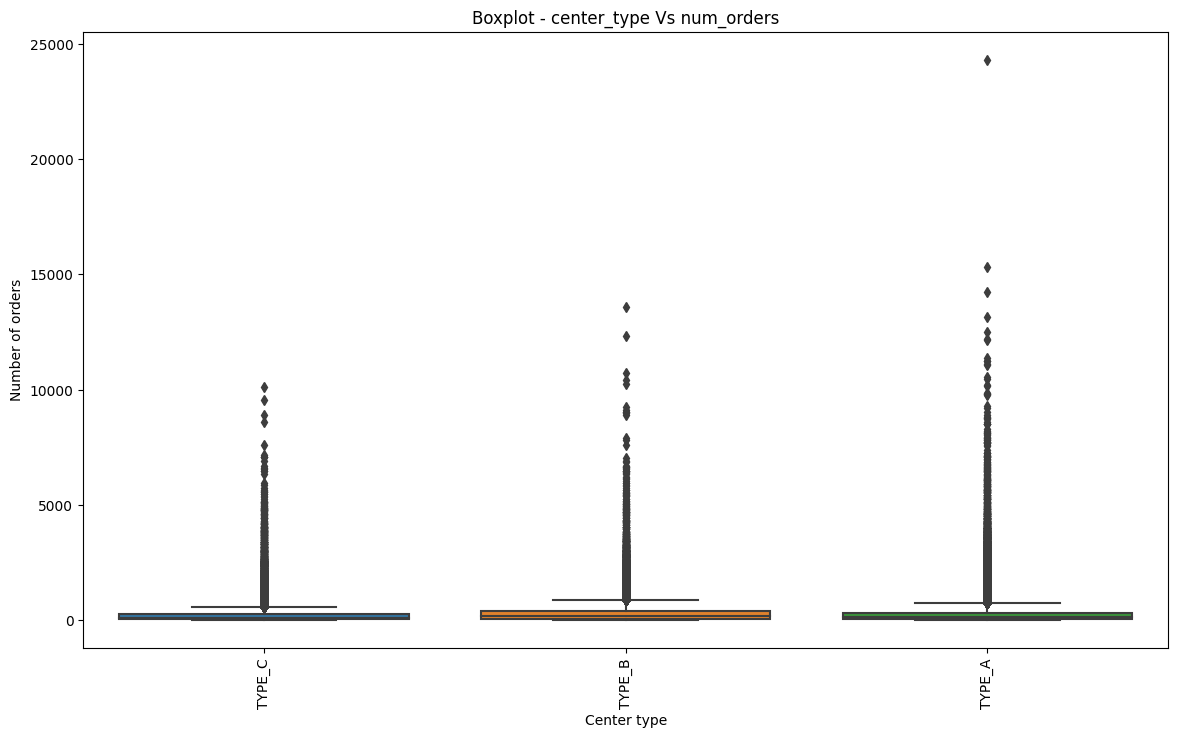

In [189]:
plt.figure(figsize=[14, 8])
sns.boxplot(x= full_train_data.center_type,y= full_train_data.num_orders)
plt.xticks(rotation=90)
plt.title("Boxplot - center_type Vs num_orders")
plt.xlabel("Center type")
plt.ylabel("Number of orders")
plt.show()

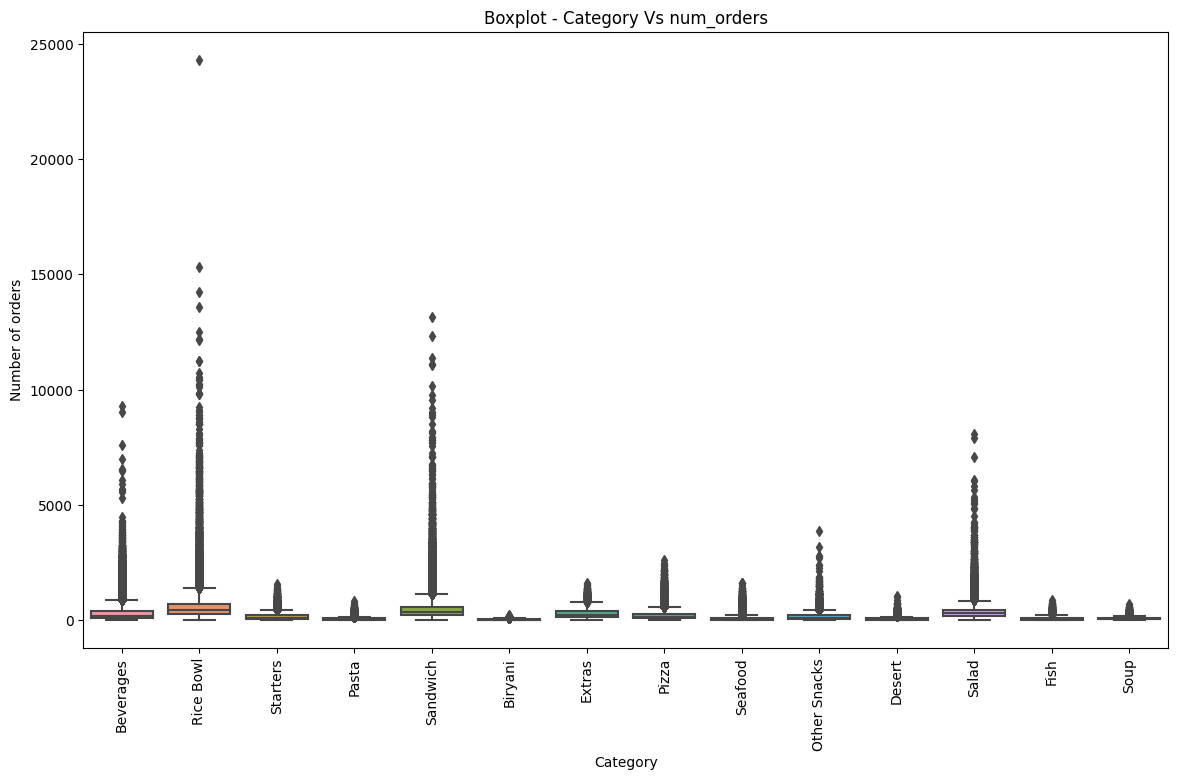

In [190]:
plt.figure(figsize=[14, 8])
sns.boxplot(x= full_train_data.category,y= full_train_data.num_orders)
plt.xticks(rotation=90)
plt.title("Boxplot - Category Vs num_orders")
plt.xlabel("Category")
plt.ylabel("Number of orders")
plt.show()

In [191]:
full_train_data[full_train_data['num_orders']>12000]

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
63582,1238452,32,146,1754,194.03,268.69,1,1,12327,Sandwich,Italian,526,34,TYPE_B,5.0
78187,1352978,5,89,2290,162.02,309.43,1,1,12489,Rice Bowl,Indian,703,56,TYPE_A,4.8
115019,1002009,5,99,2290,162.02,309.49,1,1,12137,Rice Bowl,Indian,596,71,TYPE_A,4.5
148700,1091831,5,137,2290,159.11,307.49,1,1,12177,Rice Bowl,Indian,590,56,TYPE_A,4.4
371843,1470267,5,10,2290,162.99,309.43,1,0,13580,Rice Bowl,Indian,590,56,TYPE_B,6.3
391413,1452474,5,43,2290,159.08,311.43,1,1,24299,Rice Bowl,Indian,590,56,TYPE_A,5.1
391414,1087163,6,43,2290,156.20,310.43,0,1,14229,Rice Bowl,Indian,590,56,TYPE_A,5.1
391415,1300512,7,43,2290,159.08,311.43,1,1,15336,Rice Bowl,Indian,590,56,TYPE_A,5.1
392684,1346216,132,43,1971,204.70,324.04,1,1,13150,Sandwich,Italian,590,56,TYPE_A,5.1


#### Lets plot the time-series distribution on Number of orders across weeks

<Axes: xlabel='week'>

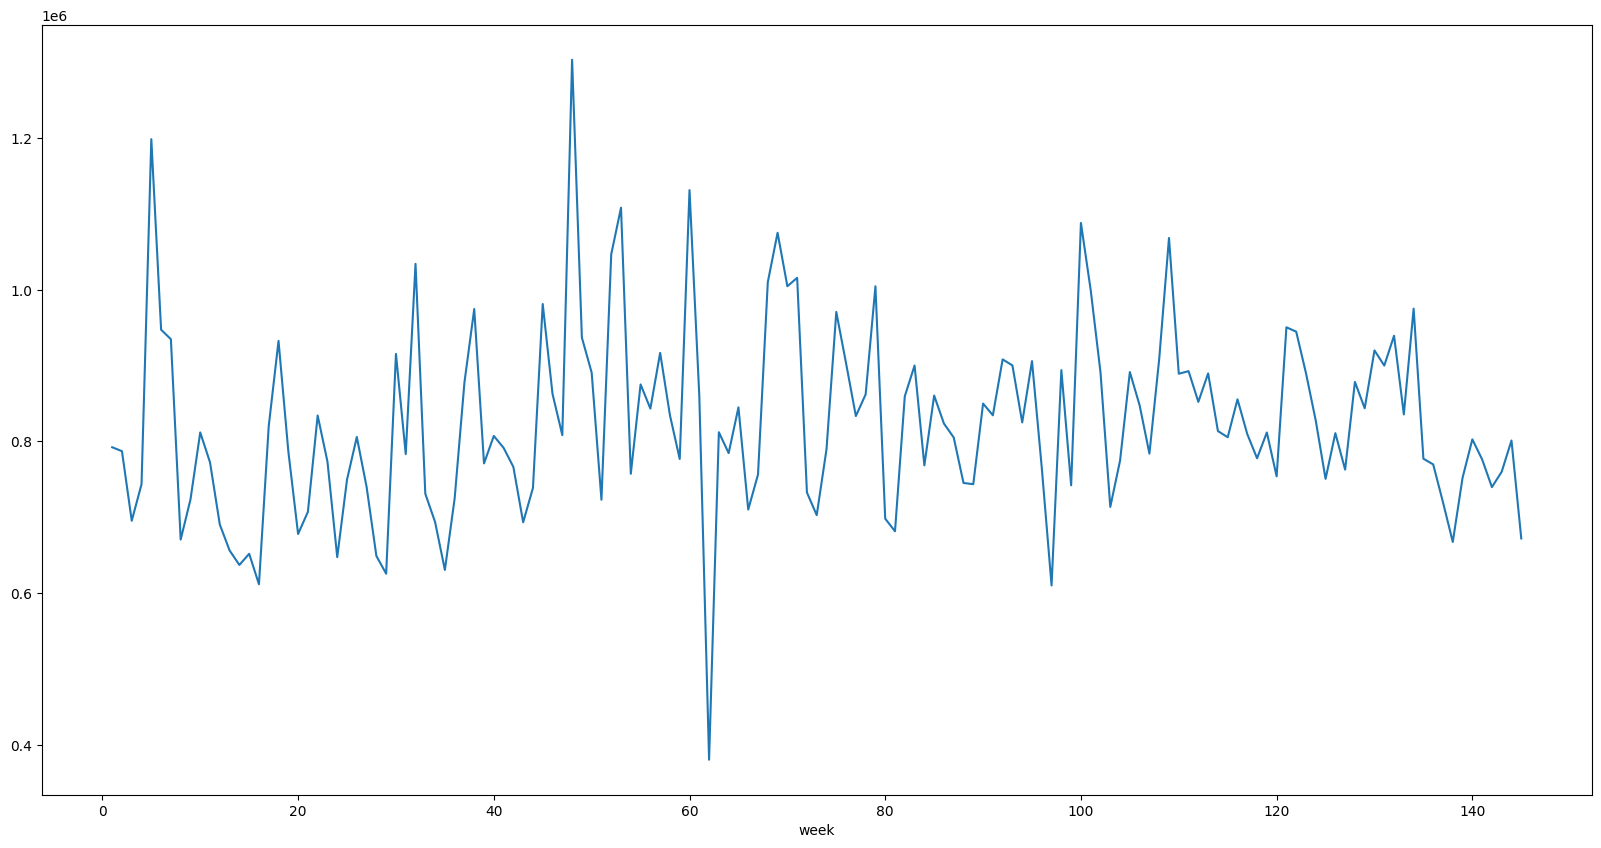

In [47]:
df_week = full_train_data.groupby(['week'])['num_orders'].sum()
df_week.plot(x='week',y='num_orders',figsize = (20,10))

Observation:
* Data doesn't follow a trend across weeks, it is more of peak and valleys without a linear trend
* No seasonality or cyclical nature visible from this chart, will plot year-on-year chart and confirm on this

### Data Pre-processing

### Outlier Checks

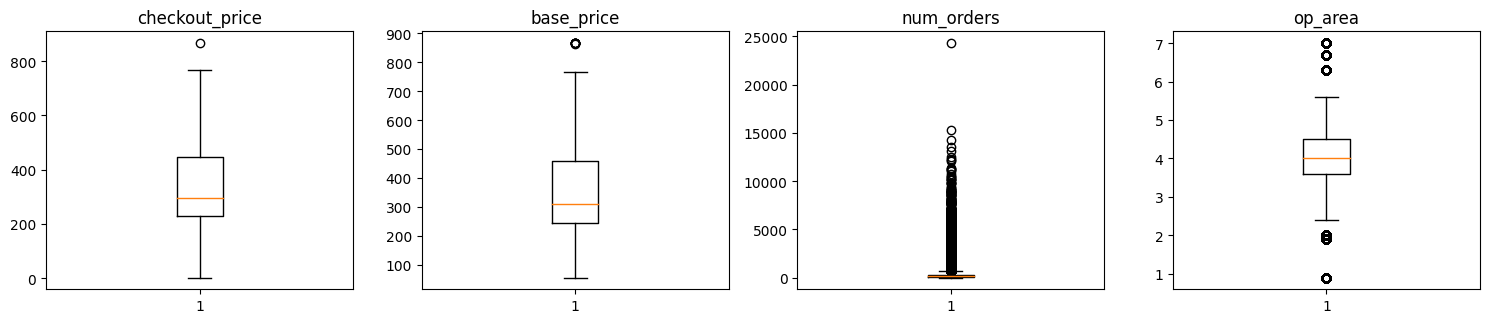

In [48]:
# outlier detection using boxplot
numeric_columns = full_train_data.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("emailer_for_promotion")
numeric_columns.remove("homepage_featured")
numeric_columns.remove("week")
numeric_columns.remove("center_id")
numeric_columns.remove("meal_id")
numeric_columns.remove("city_code")
numeric_columns.remove("region_code")
numeric_columns.remove("id")


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(full_train_data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations**

- There are quite a few outliers in the num_orders data.
- However, we will not treat them as they are proper values

### Data Preparation for modeling

- We want to forecast the num_orders. 
- Before we proceed to build a model, we'll have to encode categorical features and drop the unnecessary columns
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

Dropping Id column, because it is reduntant

Dropping Base price as it is highly correlated to checkout price

In [49]:
# dropping in train data
full_train_data = full_train_data.drop(["id", "base_price"], axis=1)

In [50]:
# dropping in train data
full_test_data = full_test_data.drop(["id", "base_price"], axis=1)

In [51]:
full_train_data.shape

(456548, 13)

In [52]:
full_test_data.shape

(32573, 12)

### feature Engineering

Adding recurring week number than continous week number

In [53]:
## Adding in train data
for i, row in full_train_data.iterrows():
    if row['week'] <= 52:
      full_train_data.at[i,'rec_week'] = row['week']
      full_train_data.at[i,'year'] = 1
    elif row['week'] > 52 and row['week'] <= 104:
      full_train_data.at[i,'rec_week'] = row['week'] - 52
      full_train_data.at[i,'year'] = 2
    else:
      full_train_data.at[i,'rec_week'] = row['week'] - 104
      full_train_data.at[i,'year'] = 3


full_train_data.head()

,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,rec_week,year
0,1,55,1885,136.83,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0,1.0,1.0
1,2,55,1885,135.83,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0,2.0,1.0
2,3,55,1885,132.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0,3.0,1.0
3,4,55,1885,135.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0,4.0,1.0
4,5,55,1885,146.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0,5.0,1.0


In [55]:
## Adding recurring week in test data
for i, row in full_test_data.iterrows():
    if row['week'] <= 52:
      full_test_data.at[i,'rec_week'] = row['week']
      full_test_data.at[i,'year'] = 1
    elif row['week'] > 52 and row['week'] <= 104:
      full_test_data.at[i,'rec_week'] = row['week'] - 52
      full_test_data.at[i,'year'] = 2
    else:
      full_test_data.at[i,'rec_week'] = row['week'] - 104
      full_test_data.at[i,'year'] = 3


full_test_data.head()

,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area,rec_week,year
0,146,55,1885,158.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0,42.0,3.0
1,147,55,1885,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0,43.0,3.0
2,149,55,1885,157.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0,45.0,3.0
3,150,55,1885,159.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0,46.0,3.0
4,151,55,1885,160.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0,47.0,3.0


#### Converting categorical variables into dummy variables

In [57]:
## for Training dataset
full_train_data = pd.get_dummies(
    full_train_data,
    columns=full_train_data.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

In [58]:
full_train_data.head()

,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,rec_week,year,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_B,center_type_TYPE_C
0,1,55,1885,136.83,0,0,177,647,56,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,2,55,1885,135.83,0,0,323,647,56,2.0,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,3,55,1885,132.92,0,0,96,647,56,2.0,3.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,4,55,1885,135.86,0,0,163,647,56,2.0,4.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,5,55,1885,146.50,0,0,215,647,56,2.0,5.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [59]:
## for testing dataset
full_test_data = pd.get_dummies(
    full_test_data,
    columns=full_test_data.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
full_test_data.head()

,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,rec_week,year,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_B,center_type_TYPE_C
0,146,55,1885,158.11,0,0,647,56,2.0,42.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,147,55,1885,159.11,0,0,647,56,2.0,43.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,149,55,1885,157.14,0,0,647,56,2.0,45.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,150,55,1885,159.14,0,0,647,56,2.0,46.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
4,151,55,1885,160.11,0,0,647,56,2.0,47.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


Plotting the num_orders with recurring week column

<Axes: xlabel='rec_week'>

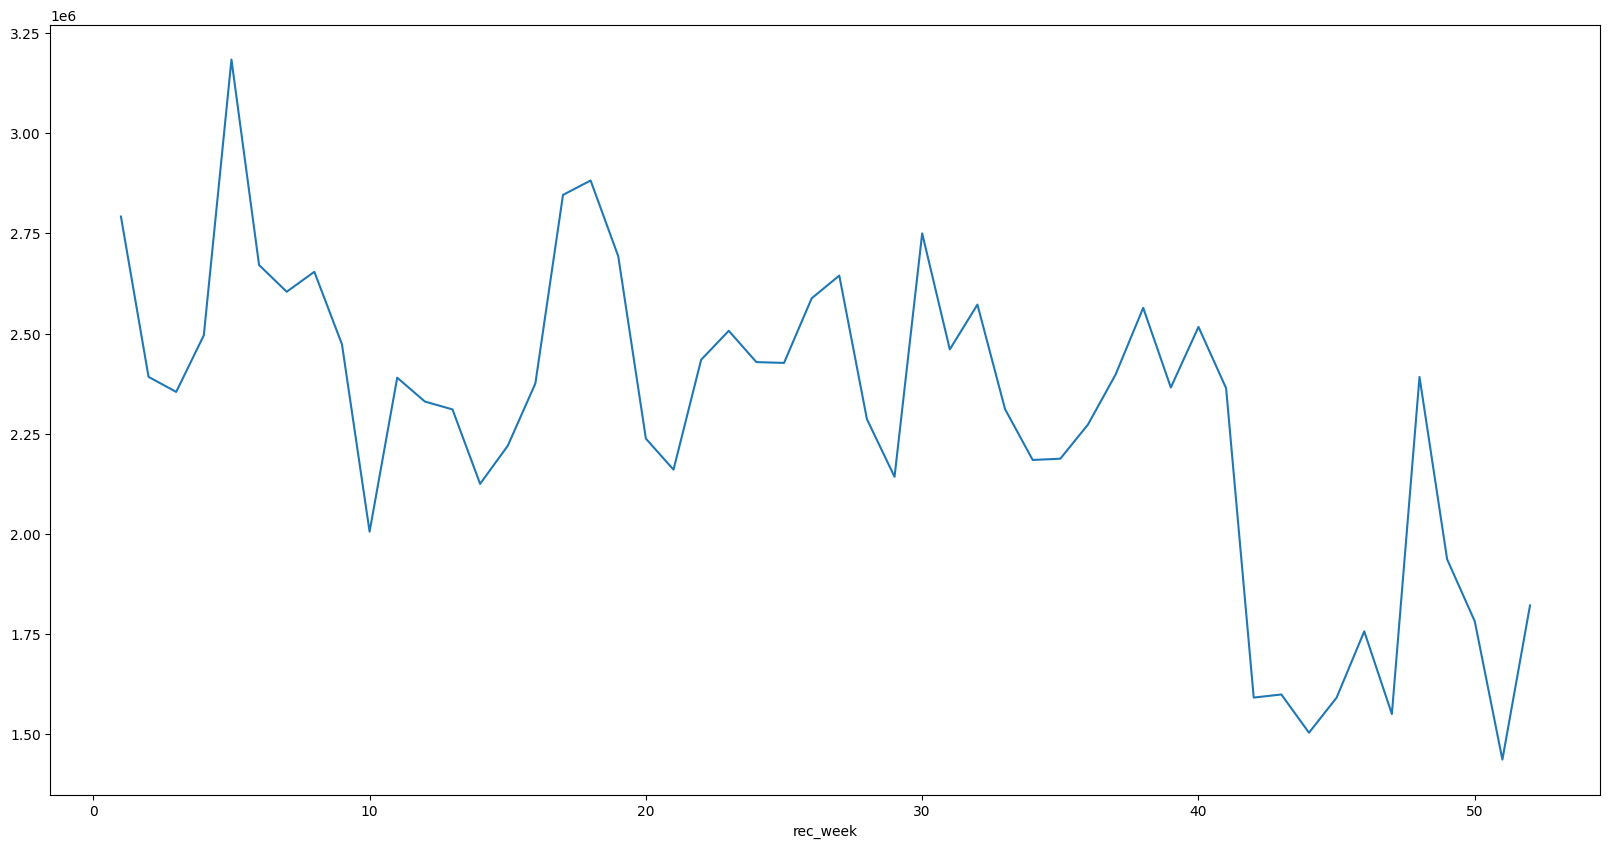

In [60]:
df_week = full_train_data.groupby(['rec_week'])['num_orders'].sum()
df_week.plot(x='week',y='num_orders',figsize = (20,10))

<Axes: xlabel='rec_week'>

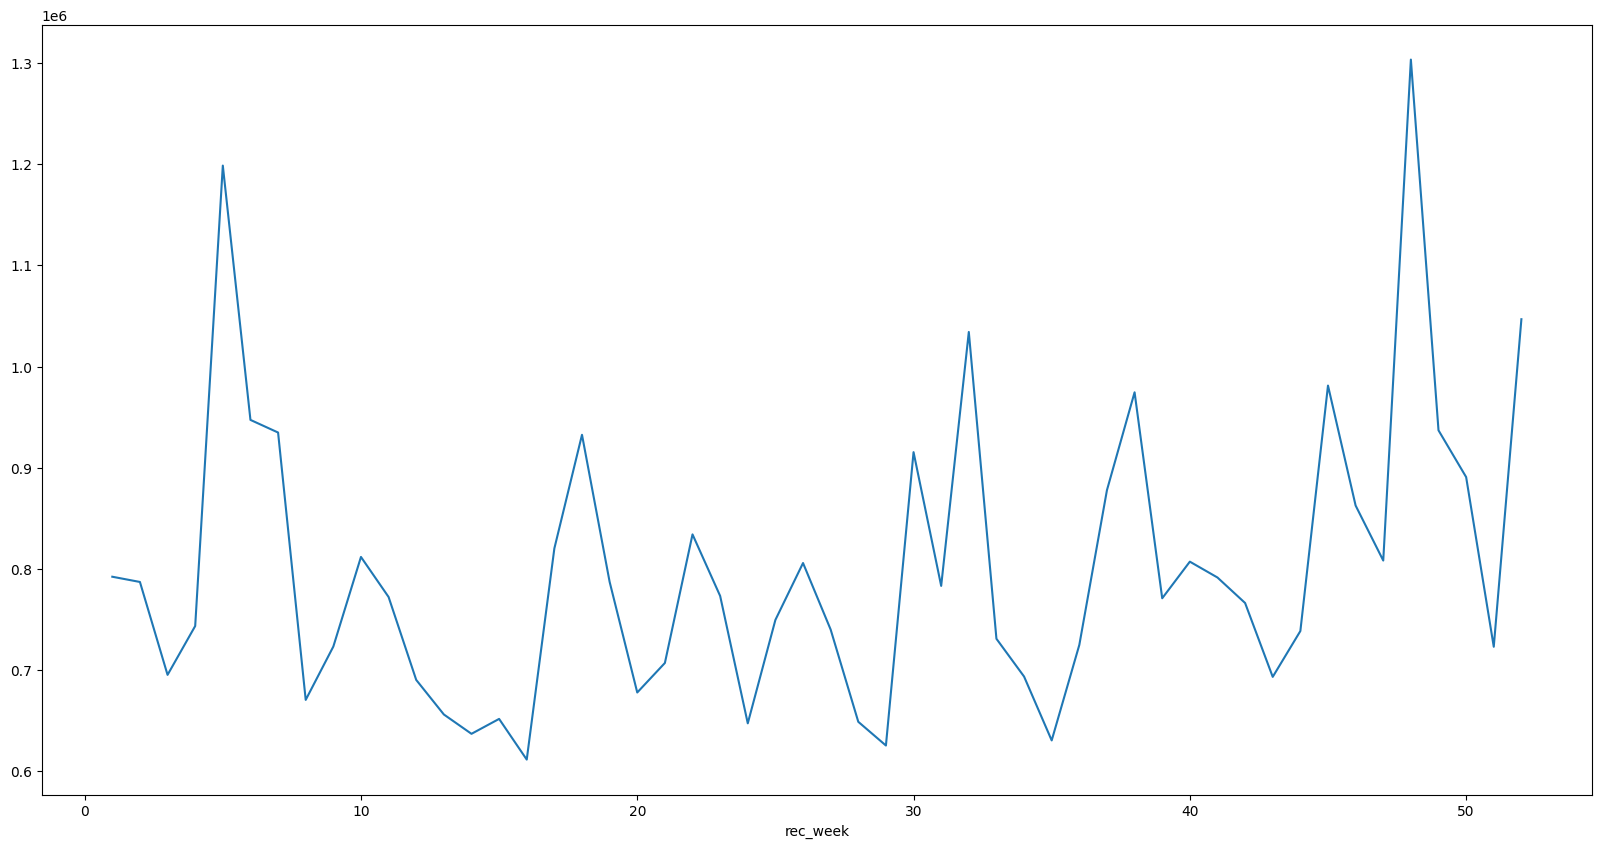

In [61]:
# time series of year 1
df_year1 = full_train_data[full_train_data['year']==1]
df_week = df_year1.groupby(['rec_week'])['num_orders'].sum()
df_week.plot(x='rec_week',y='num_orders',figsize = (20,10))

<Axes: xlabel='rec_week'>

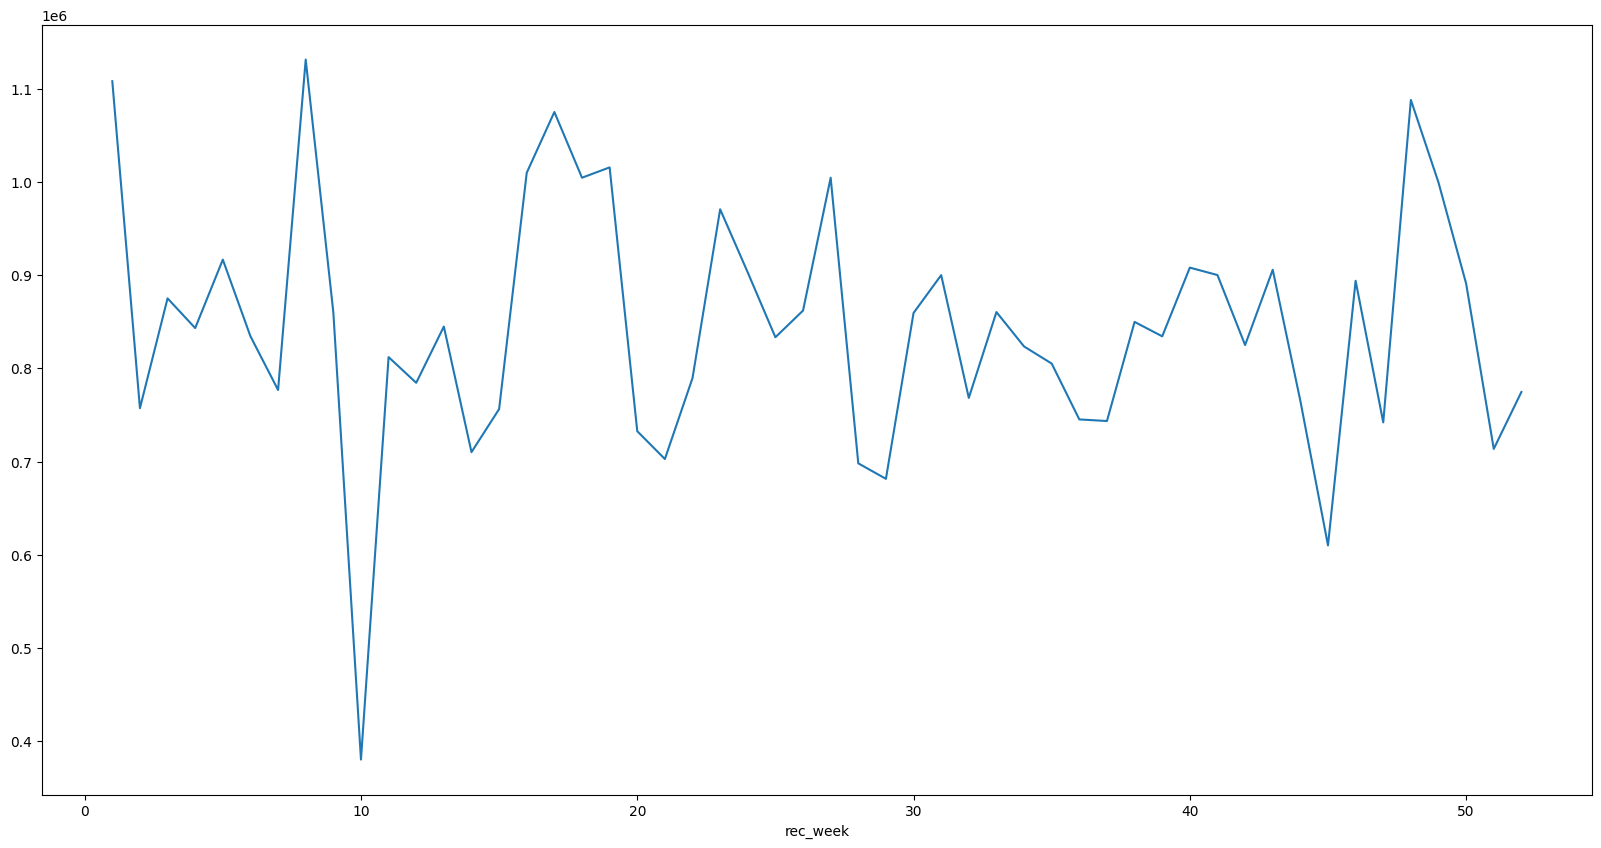

In [62]:
# time series of year 2
df_year2 = full_train_data[full_train_data['year']==2]
df_week = df_year2.groupby(['rec_week'])['num_orders'].sum()
df_week.plot(x='rec_week',y='num_orders',figsize = (20,10))

<Axes: xlabel='rec_week'>

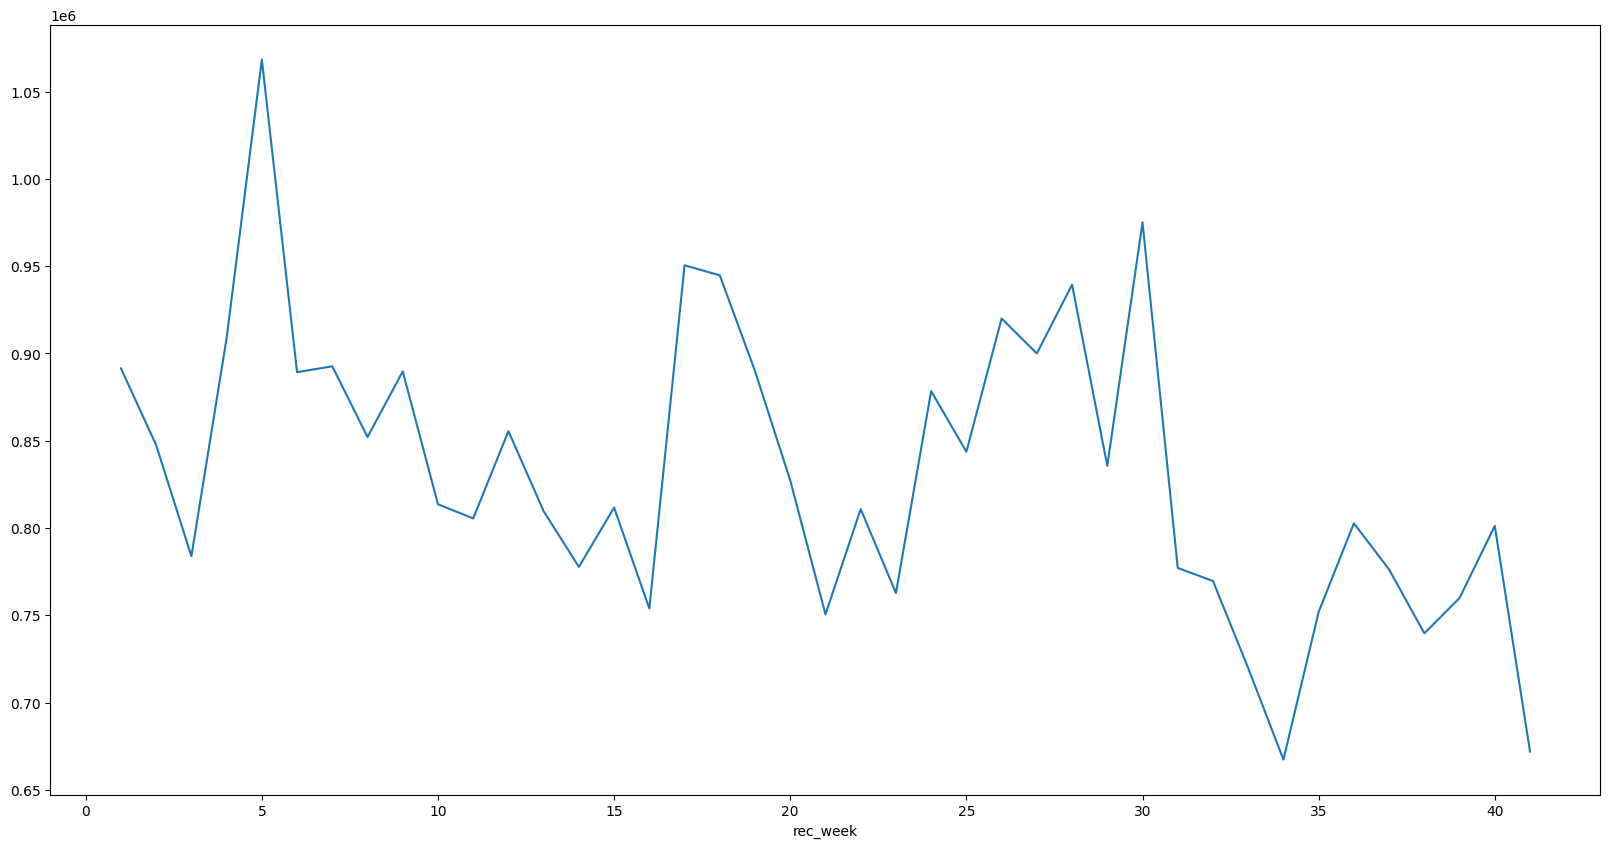

In [63]:
# time series of year 3
df_year3 = full_train_data[full_train_data['year']==3]
df_week = df_year3.groupby(['rec_week'])['num_orders'].sum()
df_week.plot(x='rec_week',y='num_orders',figsize = (20,10))

Observation: There's some seasonality

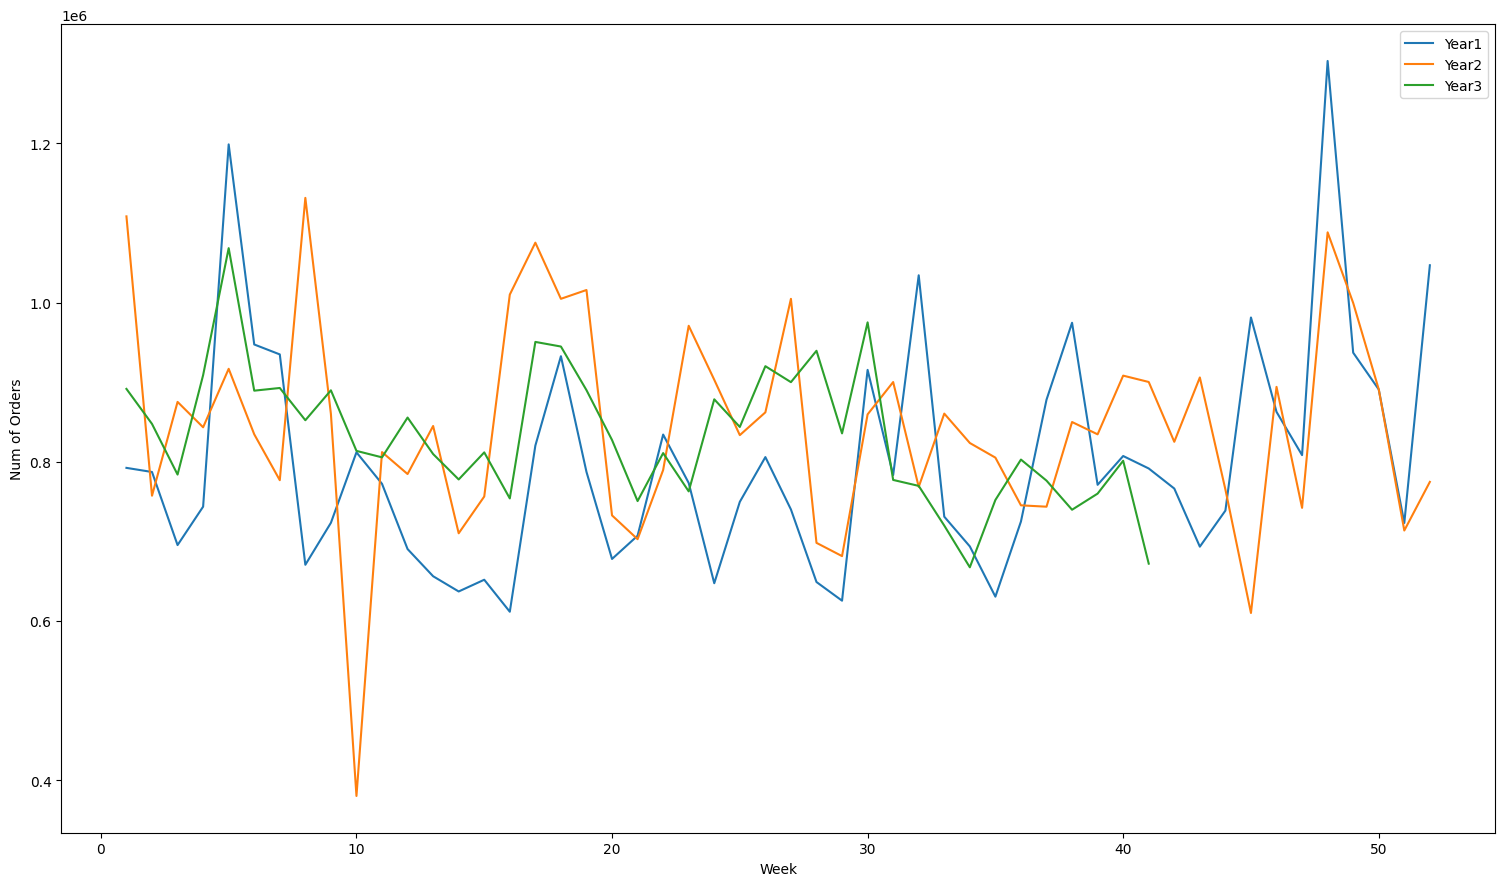

In [64]:
# time series of year 3
# df_year3 = full_train_data[full_train_data['year']==3]
# df_week_all = full_train_data.groupby(['rec_week','year'])['num_orders'].sum().reset_index()
# df_week.plot(x='rec_week',y='num_orders',figsize = (20,10), color=df_week_all.year)


import matplotlib.pyplot as plt
fig,ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

df_week_all = full_train_data.groupby(['rec_week','year'])['num_orders'].sum().reset_index()

f = [1,2,3]
b = ["Year1","Year2","Year3"]
for y,x in zip(f,b):
    ax.plot(df_week_all[df_week_all.year==y].rec_week,df_week_all[df_week_all.year==y].num_orders,label=x)

ax.set_xlabel("Week")
ax.set_ylabel("Num of Orders")
ax.legend(loc='best')

### Train test split

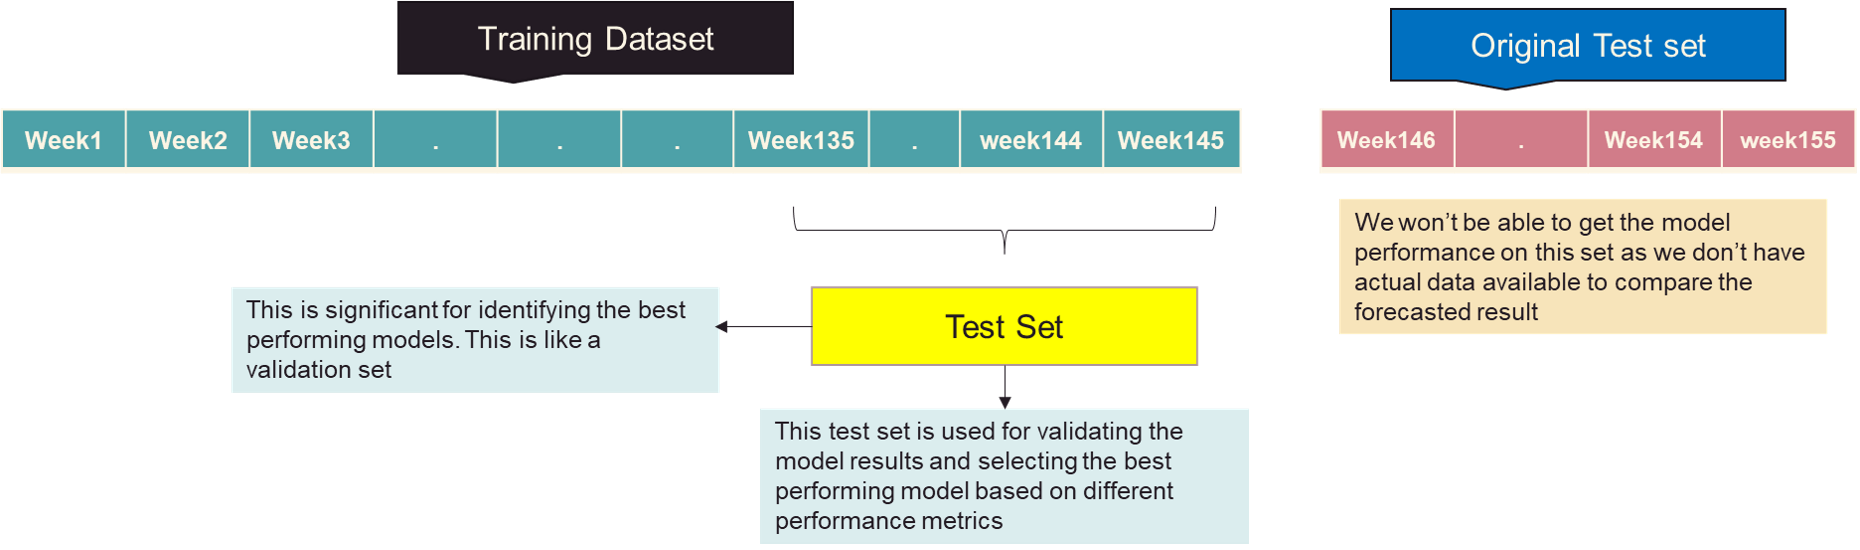

#### Splitting training and testing data based on week number

In [66]:
full_test_data['week'].min()

146

In [67]:
Train = full_train_data[full_train_data['week']<=135]
Test = full_train_data[full_train_data['week']>135]

In [68]:
Train.shape

(423727, 30)

In [69]:
Test.shape

(32821, 30)

In [70]:
# Creating X_train, y_train, X_test, y_test

X_train = Train.drop("num_orders", axis=1)
y_train = Train['num_orders']

X_test = Test.drop("num_orders", axis=1)
y_test = Test['num_orders']

In [71]:
y_train.shape

(423727,)

## Model Building

- We'll fit different models on the train data and observe their performance. 
- R-square - `Coefficient of determination` is used to evaluate the performance of a regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variables.
- Let's start by creating a function to get model scores, so that we don't have to use the same codes repeatedly.
- Along with R-square, Adj R-square, MAE, RMSE and MAPE will also be used as performance metric

In [72]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [73]:
##  Function to calculate r2_score and RMSE on train and test data
def get_model_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_r2 = metrics.r2_score(y_train, pred_train)
    test_r2 = metrics.r2_score(y_test, pred_test)
    train_rmse = np.sqrt(metrics.mean_squared_error(y_train, pred_train))
    test_rmse = np.sqrt(metrics.mean_squared_error(y_test, pred_test))

    # Adding all scores in the list
    score_list.extend((train_r2, test_r2, train_rmse, test_rmse))

    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag == True:
        print("R-sqaure on training set : ", metrics.r2_score(y_train, pred_train))
        print("R-square on test set : ", metrics.r2_score(y_test, pred_test))
        print(
            "RMSE on training set : ",
            np.sqrt(metrics.mean_squared_error(y_train, pred_train)),
        )
        print(
            "RMSE on test set : ",
            np.sqrt(metrics.mean_squared_error(y_test, pred_test)),
        )

    # returning the list with train and test scores
    return score_list

### Linear Regression

In [74]:
LRmodel = LinearRegression()
LRmodel.fit(X_train,y_train)

LinearRegression()

### Checking model performance on training set

In [75]:
LR_model_train_perf = model_performance_regression(LRmodel, X_train, y_train)
LR_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,310.001403,164.510033,0.409956,0.409916,153.675822


### Checking model performance on test set

In [76]:
LR_model_test_perf = model_performance_regression(LRmodel, X_test, y_test)
LR_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,211.946637,143.539328,0.412824,0.412304,151.673942


### Decision Tree model

In [77]:
dtree = DecisionTreeRegressor(random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

#### Checking model performance on training set

In [78]:
dtree_model_train_perf = model_performance_regression(dtree, X_train, y_train)
dtree_model_train_perf


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.0,0.0,1.0,1.0,0.0


#### Checking model performance on test set

In [79]:
dtree_model_test_perf = model_performance_regression(dtree, X_test, y_test)
dtree_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,172.660583,95.825904,0.610326,0.609981,68.994108


- The Decision tree model with default parameters is overfitting the train data.

## Random Forest Model

In [80]:
rf_estimator = RandomForestRegressor(random_state=1)
rf_estimator.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

#### Checking model performance on training set

In [81]:
rf_estimator_model_train_perf = model_performance_regression(
    rf_estimator, X_train, y_train
)
rf_estimator_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,52.94938,24.680469,0.982786,0.982785,17.404547


#### Checking model performance on test set

In [82]:
rf_estimator_model_test_perf = model_performance_regression(
    rf_estimator, X_test, y_test
)
rf_estimator_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,127.028595,72.768786,0.78908,0.788893,57.346302


Random forest showed good performance in test set

## Boosting Models

### Gradient Boosting Regressor

In [83]:
gb_estimator = GradientBoostingRegressor(random_state=1)
gb_estimator.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1)

#### Checking model performance on training set

In [84]:
gb_estimator_model_train_perf = model_performance_regression(
    gb_estimator, X_train, y_train
)
gb_estimator_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,234.534687,119.243349,0.662269,0.662246,98.811088


#### Checking model performance on test set

In [85]:
gb_estimator_model_test_perf = model_performance_regression(
    gb_estimator, X_test, y_test
)
gb_estimator_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,168.073997,107.521684,0.630753,0.630427,101.756285


No overfitting, decent model result

### XGBoost Regressor

In [86]:
xgb_estimator = XGBRegressor(random_state=1)
xgb_estimator.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=1, ...)

#### Checking model performance on training set

In [87]:
xgb_estimator_model_train_perf = model_performance_regression(
    xgb_estimator, X_train, y_train
)
xgb_estimator_model_train_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,140.68947,77.048223,0.878471,0.878463,61.912413


#### Checking model performance on test set

In [88]:
xgb_estimator_model_test_perf = model_performance_regression(
    xgb_estimator, X_test, y_test
)
xgb_estimator_model_test_perf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,128.826251,79.098546,0.783068,0.782876,67.62712


No overfitting on train-set and best result in test-set

### Model Comparison

In [91]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        LR_model_train_perf.T,
        dtree_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        gb_estimator_model_train_perf.T,
        xgb_estimator_model_train_perf.T,
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression",
    "Decision Tree",
    "Random Forest Estimator",
    "Gradient Boost Estimator",
    "XGB",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression,Decision Tree,Random Forest Estimator,Gradient Boost Estimator,XGB
RMSE,310.001403,0.0,52.949380,234.534687,140.689470
MAE,164.510033,0.0,24.680469,119.243349,77.048223
R-squared,0.409956,1.0,0.982786,0.662269,0.878471
Adj. R-squared,0.409916,1.0,0.982785,0.662246,0.878463
MAPE,153.675822,0.0,17.404547,98.811088,61.912413


In [93]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [
        LR_model_test_perf.T,
        dtree_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        gb_estimator_model_test_perf.T,
        xgb_estimator_model_test_perf.T,
    ],
    axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression",
    "Decision Tree",
    "Random Forest Estimator",
    "Gradient Boost Estimator",
    "XGB",
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Linear Regression,Decision Tree,Random Forest Estimator,Gradient Boost Estimator,XGB
RMSE,211.946637,172.660583,127.028595,168.073997,128.826251
MAE,143.539328,95.825904,72.768786,107.521684,79.098546
R-squared,0.412824,0.610326,0.789080,0.630753,0.783068
Adj. R-squared,0.412304,0.609981,0.788893,0.630427,0.782876
MAPE,151.673942,68.994108,57.346302,101.756285,67.627120


Observation:
- Random Forest and XGBoost are our best model
- Random forest performs slightly better than XGboost, so we will choose random forest as our best model

### Important features of the Random forest estimator model

In [94]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        rf_estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                            Imp
checkout_price         0.236831
op_area                0.121039
category_Rice Bowl     0.089480
homepage_featured      0.089289
meal_id                0.057162
center_id              0.056389
category_Sandwich      0.054369
week                   0.050549
rec_week               0.041582
emailer_for_promotion  0.039124
city_code              0.036835
cuisine_Italian        0.025483
region_code            0.024052
cuisine_Indian         0.014399
cuisine_Thai           0.012330
center_type_TYPE_C     0.010940
category_Salad         0.009410
center_type_TYPE_B     0.007766
category_Extras        0.007074
category_Pasta         0.005498
category_Pizza         0.003624
year                   0.003466
category_Soup          0.001439
category_Other Snacks  0.000558
category_Seafood       0.000371
category_Starters      0.000318
category_Biryani       0.000315
category_Desert        0.000227
category_Fish          0.000079


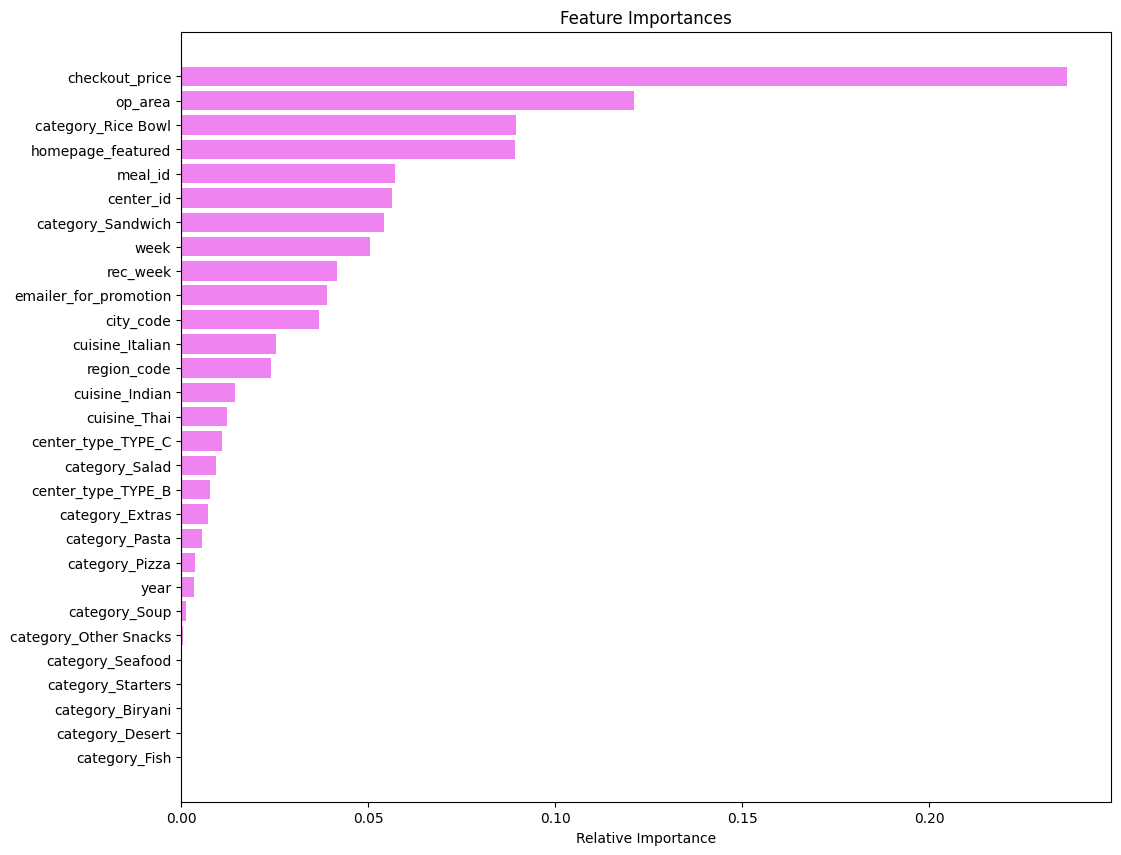

In [95]:
feature_names = X_train.columns
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 10))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observation:
- Checkout Price is most important features
- Operation area is the second most significant feature
- Derived feature recurring week is also seems to significant
- Homepage feature and email promotion is also significant to forecasted value
- Only few dummy variables in category column is significant rest is non-significant

### Observed vs Predicted Plot

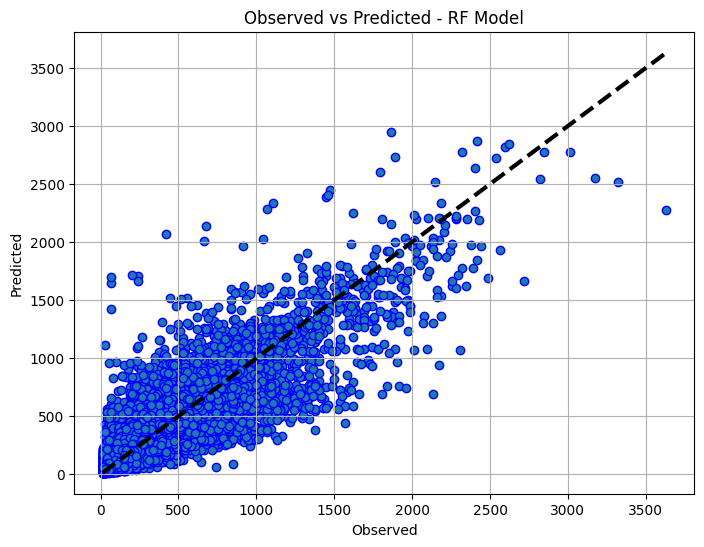

In [96]:
# So plot observed and predicted values of the test data for the best model i.e. Random forest model
fig, ax = plt.subplots(figsize=(8, 6))
y_pred = rf_estimator.predict(X_test)
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=3)
ax.set_xlabel("Observed")
ax.set_ylabel("Predicted")
ax.set_title("Observed vs Predicted - RF Model")
plt.grid()
plt.show()

- We can see that points are dense on the line where predicted is equal to the observed.
- This implies that most of the predicted values are close to the true values with some exceptions as seen in the plot.

### Finally predicting on original test set

In [97]:
##predicting on final dataset
final_prediction = rf_estimator.predict(full_test_data)
final_prediction

array([260.02, 259.62, 257.73, ...,  42.75,  43.72,  41.49])

In [99]:
##adding predicted values into test dataframe
full_test_data['num_orders'] = final_prediction
full_test_data.head()

,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,rec_week,year,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_B,center_type_TYPE_C,num_orders
0,146,55,1885,158.11,0,0,647,56,2.0,42.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,260.02
1,147,55,1885,159.11,0,0,647,56,2.0,43.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,259.62
2,149,55,1885,157.14,0,0,647,56,2.0,45.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,257.73
3,150,55,1885,159.14,0,0,647,56,2.0,46.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,259.62
4,151,55,1885,160.11,0,0,647,56,2.0,47.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,259.62


### Plotting validation forecast and final test forecast in one graph

In [100]:
##predicting on validation test dataset to plot the result
val_prediction = rf_estimator.predict(X_test)
val_prediction

array([148.08, 181.69, 181.69, ...,  42.4 ,  37.95,  44.17])

In [101]:
# Creating a copy of validation dataframe
val_test_copy = X_test.copy()
val_test_copy['num_orders'] = val_prediction
val_test_copy.head()

,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,rec_week,year,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_B,center_type_TYPE_C,num_orders
135,136,55,1885,148.44,0,0,647,56,2.0,32.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,148.08
136,137,55,1885,153.29,0,0,647,56,2.0,33.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,181.69
137,138,55,1885,155.23,0,0,647,56,2.0,34.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,181.69
138,139,55,1885,150.35,0,0,647,56,2.0,35.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,146.86
139,140,55,1885,151.35,0,0,647,56,2.0,36.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,166.84


In [104]:
y_train.shape

(423727,)

In [105]:
##Creating train for plotting
train_copy = X_train.copy()
train_copy['num_orders'] = y_train
train_copy.head()

,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,rec_week,year,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_B,center_type_TYPE_C,num_orders
0,1,55,1885,136.83,0,0,647,56,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,177
1,2,55,1885,135.83,0,0,647,56,2.0,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,323
2,3,55,1885,132.92,0,0,647,56,2.0,3.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,96
3,4,55,1885,135.86,0,0,647,56,2.0,4.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,163
4,5,55,1885,146.50,0,0,647,56,2.0,5.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,215


In [106]:
## Concatenating train, val and test data together
full_concat_table = pd.concat([train_copy,val_test_copy,full_test_data]) 
full_concat_table.shape

(489121, 30)

In [107]:
full_train_data['week'].max()

145

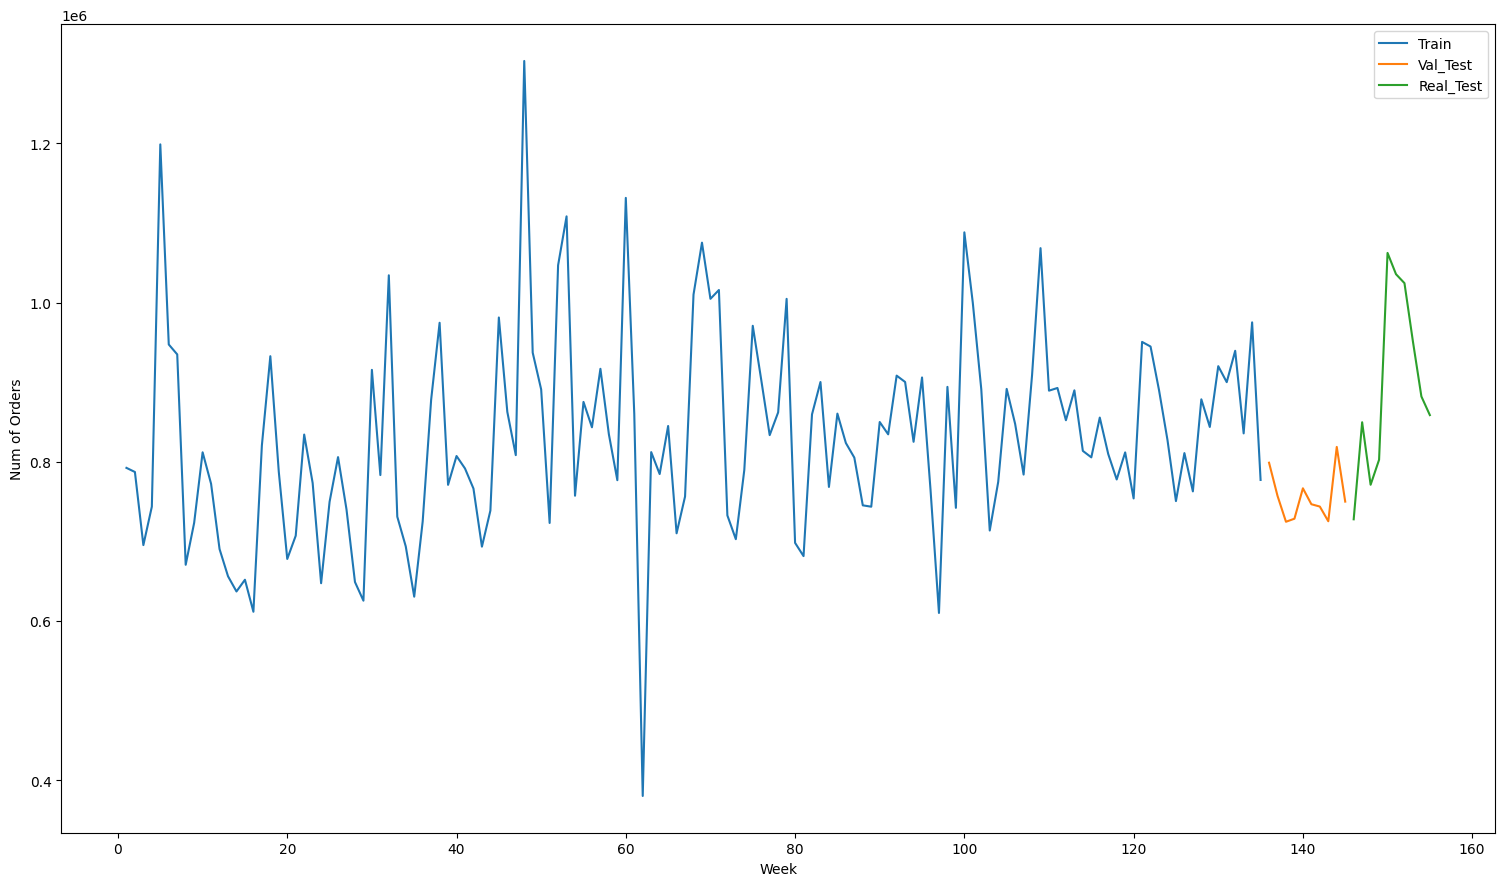

In [108]:
# time series of year 3
# df_year3 = full_train_data[full_train_data['year']==3]
# df_week_all = full_train_data.groupby(['rec_week','year'])['num_orders'].sum().reset_index()
# df_week.plot(x='rec_week',y='num_orders',figsize = (20,10), color=df_week_all.year)


import matplotlib.pyplot as plt
fig,ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

def f(row):
    if row['week'] <= 135:
        val = "Train"
    elif (row['week'] > 135) and (row['week'] <= 145):
        val = "Val_Test"
    else:
        val = "Real_Test"
    return val

df_week_all = full_concat_table.groupby(['week'])['num_orders'].sum().reset_index()
df_week_all['Type'] = df_week_all.apply(f, axis=1)

x = ["Train","Val_Test","Real_Test"]
for y in x:
    ax.plot(df_week_all[df_week_all.Type==y].week,df_week_all[df_week_all.Type==y].num_orders,label=y)

ax.set_xlabel("Week")
ax.set_ylabel("Num of Orders")
ax.legend(loc='best')

## Conclusion

## FInal Recommendation to the Centers

In [125]:
prediction_center = full_test_data.groupby(['center_id'])['num_orders'].sum().reset_index()
prediction_center.sort_values('num_orders', ascending=False, inplace=True)
# prediction_center

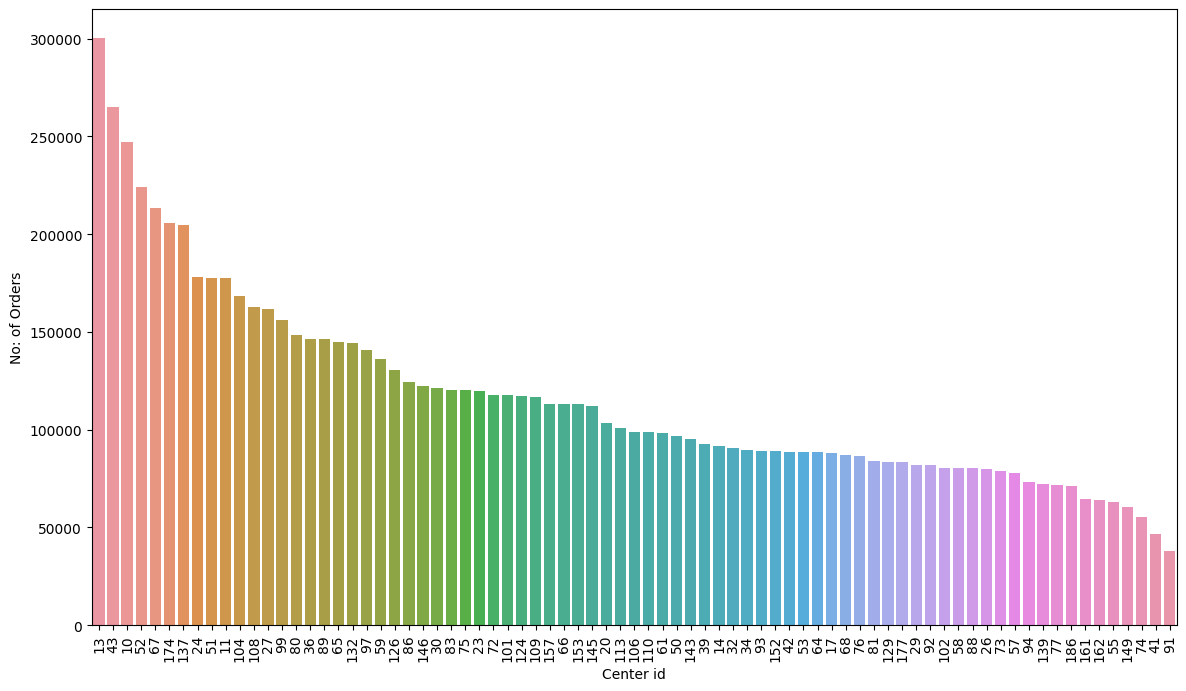

In [124]:
##plotting prediction across center
plot_order = prediction_center.groupby('center_id')['num_orders'].sum().sort_values(ascending=False).index.values
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
a = sns.barplot(x=prediction_center.center_id, y=prediction_center.num_orders,order=plot_order)
a.set_xlabel("Center id")
a.set_ylabel("No: of Orders")
plt.show()

In [128]:
full_test_data.head()

,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,rec_week,year,category_Biryani,category_Desert,category_Extras,category_Fish,category_Other Snacks,category_Pasta,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai,center_type_TYPE_B,center_type_TYPE_C,num_orders
0,146,55,1885,158.11,0,0,647,56,2.0,42.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,260.02
1,147,55,1885,159.11,0,0,647,56,2.0,43.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,259.62
2,149,55,1885,157.14,0,0,647,56,2.0,45.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,257.73
3,150,55,1885,159.14,0,0,647,56,2.0,46.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,259.62
4,151,55,1885,160.11,0,0,647,56,2.0,47.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,259.62


Creating Final predicted data at Week x Center_id x Meal_id level

In [131]:
center_meal = full_test_data.groupby(['week','center_id','meal_id'])['num_orders'].sum().reset_index()
center_meal

,week,center_id,meal_id,num_orders
0,146,10,1062,917.80
1,146,10,1109,1464.16
2,146,10,1198,416.03
3,146,10,1207,203.37
4,146,10,1216,140.27
...,...,...,...,...
32568,155,186,2664,212.38
32569,155,186,2704,104.99
32570,155,186,2707,202.48
32571,155,186,2760,108.30


Adding Meal info data to final predicted data

In [132]:
center_meal = center_meal.merge(meal_info_data, on="meal_id", how="inner")
center_meal

,week,center_id,meal_id,num_orders,category,cuisine
0,146,10,1062,917.80,Beverages,Italian
1,146,11,1062,859.91,Beverages,Italian
2,146,13,1062,993.38,Beverages,Italian
3,146,14,1062,428.28,Beverages,Italian
4,146,17,1062,511.84,Beverages,Italian
...,...,...,...,...,...,...
32568,155,143,1247,47.31,Biryani,Indian
32569,155,145,1247,25.04,Biryani,Indian
32570,155,152,1247,30.64,Biryani,Indian
32571,155,157,1247,21.53,Biryani,Indian


Category vs Num of orders

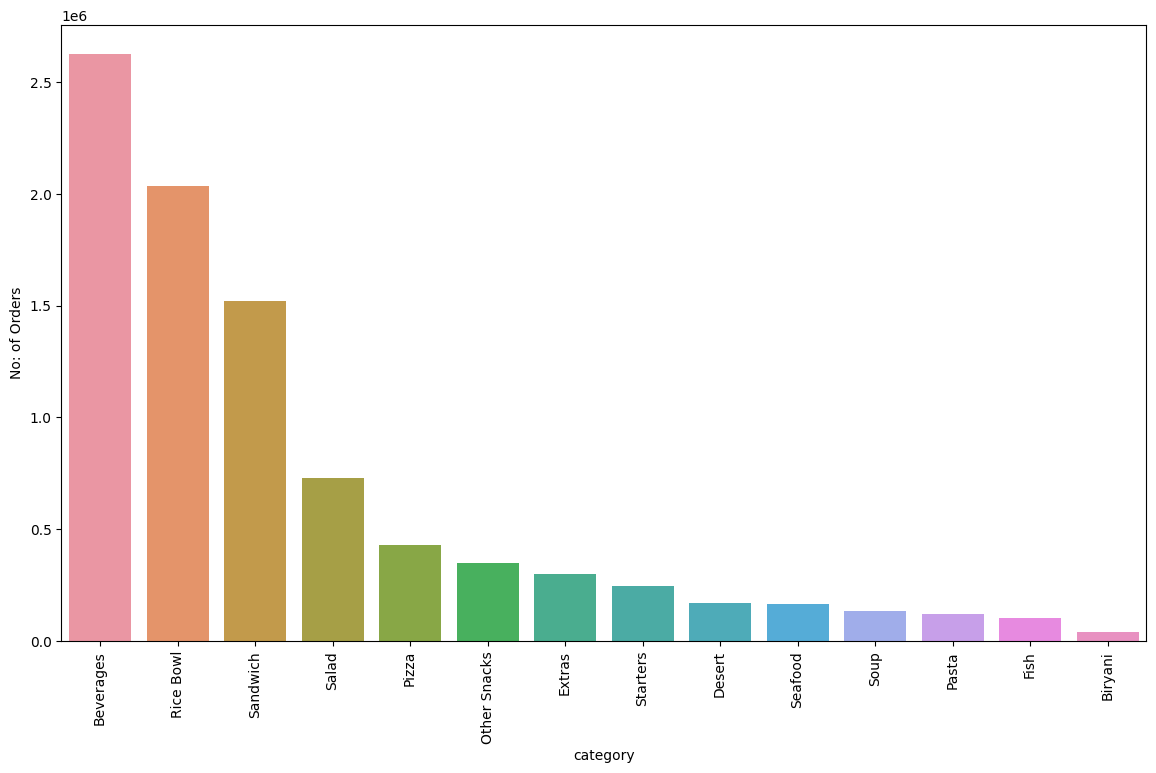

In [133]:
df_revenue1 = center_meal.groupby(["category"], as_index=False)[
    "num_orders"
].sum()
plot_order = center_meal.groupby('category')['num_orders'].sum().sort_values(ascending=False).index.values
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
a = sns.barplot(x=df_revenue1.category, y=df_revenue1.num_orders, order=plot_order)
a.set_xlabel("category")
a.set_ylabel("No: of Orders")
plt.show()

Most ordering category will be Beverages and Rice bowl

Cusine vs Num of orders

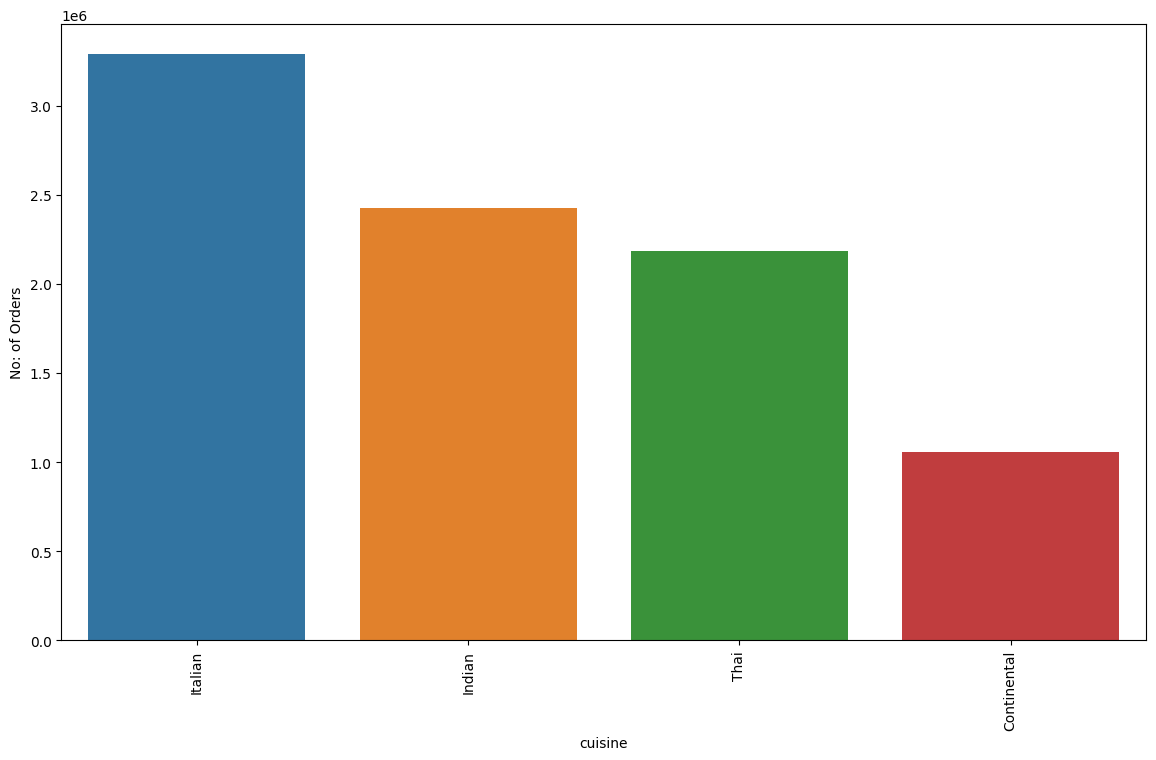

In [134]:
df_revenue1 = center_meal.groupby(["cuisine"], as_index=False)[
    "num_orders"
].sum()
plot_order = center_meal.groupby('cuisine')['num_orders'].sum().sort_values(ascending=False).index.values
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
a = sns.barplot(x=df_revenue1.cuisine, y=df_revenue1.num_orders, order=plot_order)
a.set_xlabel("cuisine")
a.set_ylabel("No: of Orders")
plt.show()

- Most ordering Cuisine will be Italian
- Second most ordering cuisine will be Indian

Most ordered Meal category in Italian cuisine

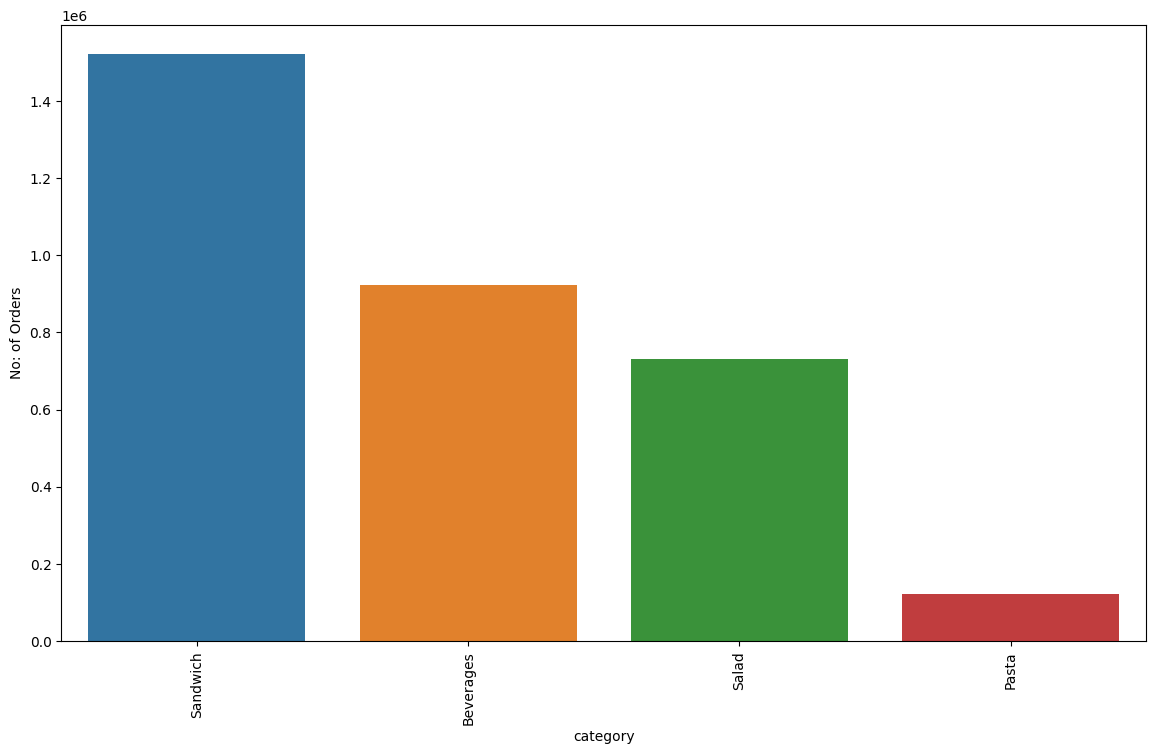

In [137]:
df_revenue1 = center_meal[center_meal['cuisine']=='Italian'].groupby(["category"], as_index=False)[
    "num_orders"
].sum()
plot_order = center_meal[center_meal['cuisine']=='Italian'].groupby('category')['num_orders'].sum().sort_values(ascending=False).index.values
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
a = sns.barplot(x=df_revenue1.category, y=df_revenue1.num_orders, order=plot_order)
a.set_xlabel("category")
a.set_ylabel("No: of Orders")
plt.show()

Most ordering Italian meal category will be sandwich then followed by beverages and salads

Most ordering meal category in Indian cusine

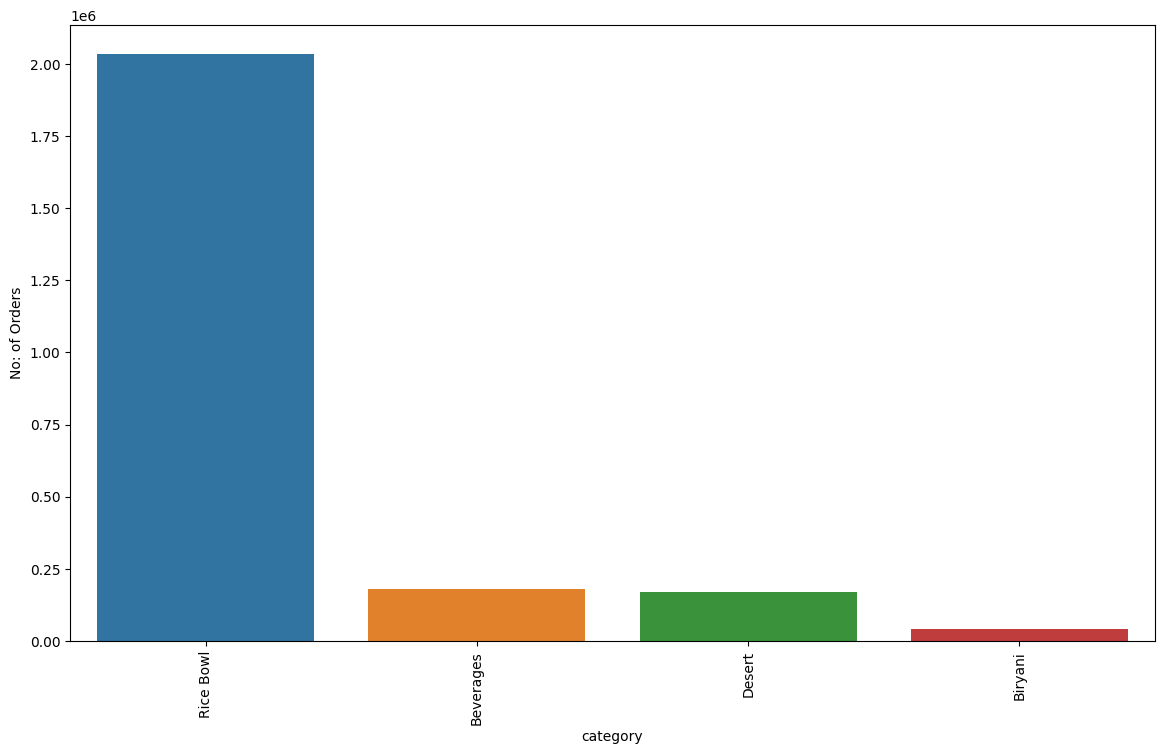

In [136]:
df_revenue1 = center_meal[center_meal['cuisine']=='Indian'].groupby(["category"], as_index=False)[
    "num_orders"
].sum()
plot_order = center_meal[center_meal['cuisine']=='Indian'].groupby('category')['num_orders'].sum().sort_values(ascending=False).index.values
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
a = sns.barplot(x=df_revenue1.category, y=df_revenue1.num_orders, order=plot_order)
a.set_xlabel("category")
a.set_ylabel("No: of Orders")
plt.show()

Most ordering Indian meal category will be rice bowl followed by beverages and desserts

Most ordering meal category in Thai cuisine

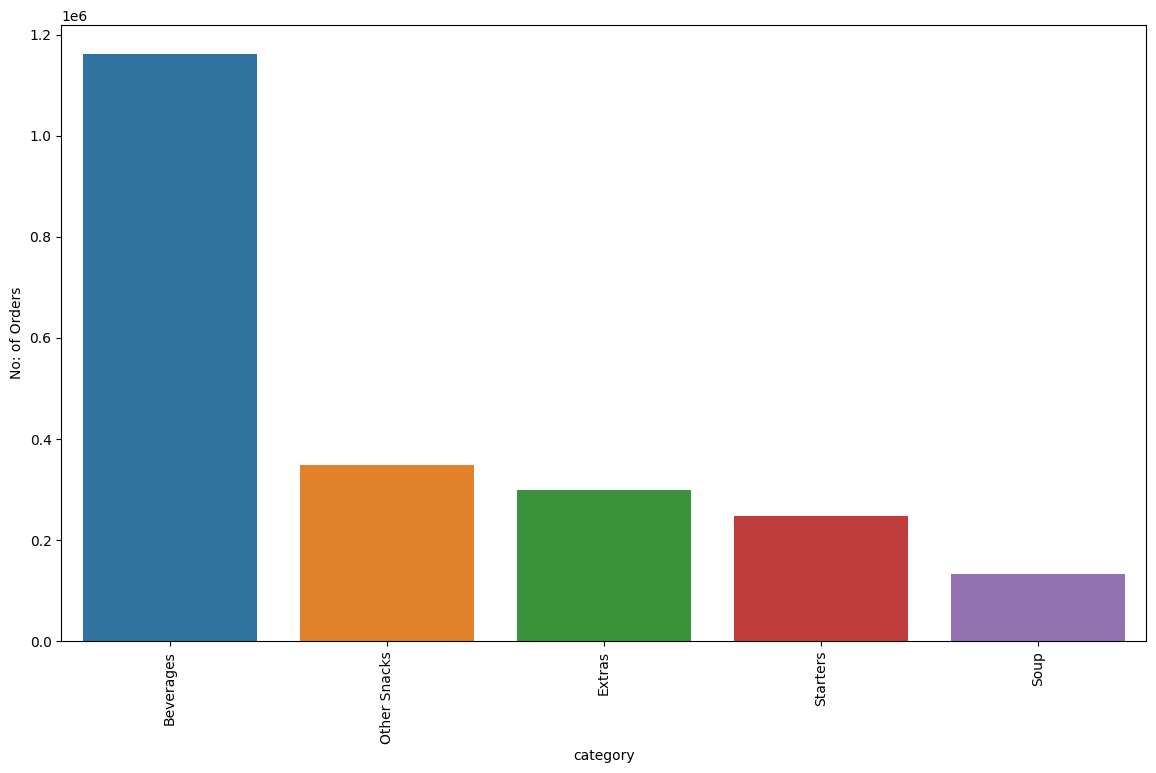

In [138]:
df_revenue1 = center_meal[center_meal['cuisine']=='Thai'].groupby(["category"], as_index=False)[
    "num_orders"
].sum()
plot_order = center_meal[center_meal['cuisine']=='Thai'].groupby('category')['num_orders'].sum().sort_values(ascending=False).index.values
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
a = sns.barplot(x=df_revenue1.category, y=df_revenue1.num_orders, order=plot_order)
a.set_xlabel("category")
a.set_ylabel("No: of Orders")
plt.show()

Most ordering Thai food will be beverages

Most ordering meal category in continental

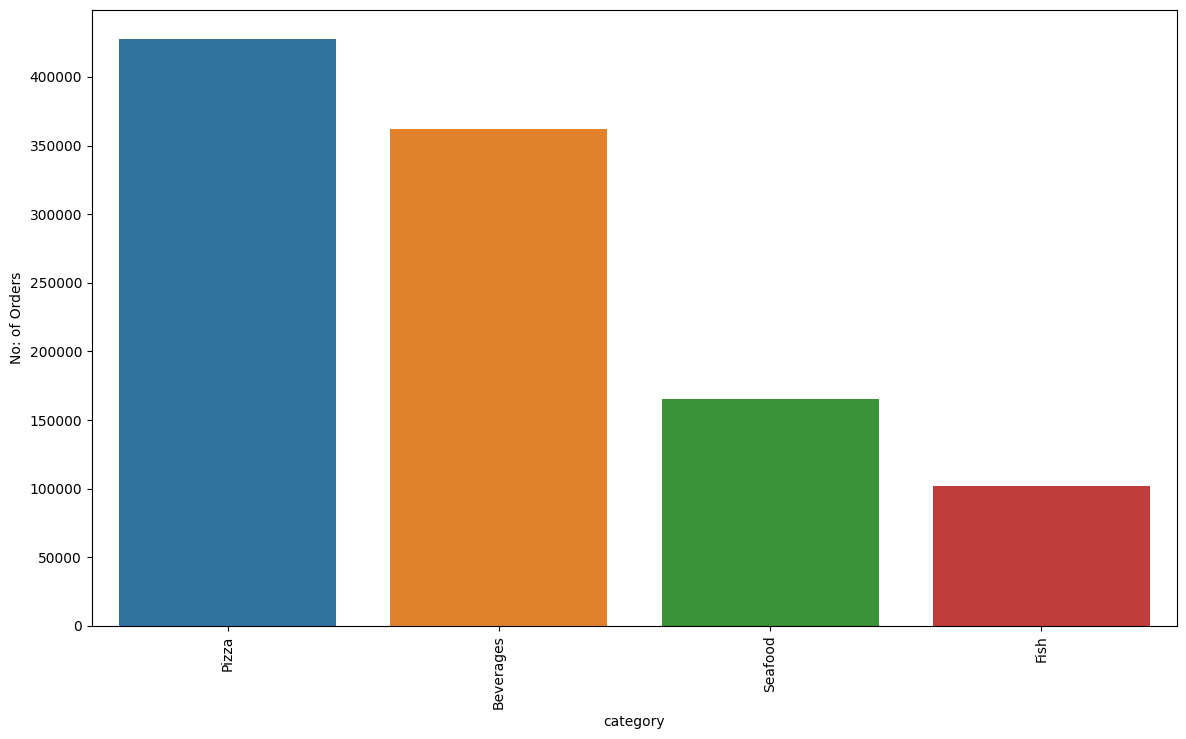

In [139]:
df_revenue1 = center_meal[center_meal['cuisine']=='Continental'].groupby(["category"], as_index=False)[
    "num_orders"
].sum()
plot_order = center_meal[center_meal['cuisine']=='Continental'].groupby('category')['num_orders'].sum().sort_values(ascending=False).index.values
plt.figure(figsize=[14, 8])
plt.xticks(rotation=90)
a = sns.barplot(x=df_revenue1.category, y=df_revenue1.num_orders, order=plot_order)
a.set_xlabel("category")
a.set_ylabel("No: of Orders")
plt.show()

Most ordering Continental food will be Pizza

Insights to centers:
- Most ordering category will be Beverages and Rice bowl
- Most ordering Cuisine will be Italian
- Second most ordering cuisine will be Indian
- Most ordering Italian meal category will be sandwich then followed by beverages and salads
- Most ordering Indian meal category will be rice bowl followed by beverages and desserts
- Most ordering Thai food will be beverages
- Most ordering Continental food will be Pizza
- Center 13 will have highest number of orders

**Insights from Data:**
- Checkout Price is the important feature for prediction, Check out Price is the main factor determining the number of orders. The more discounted the checkout price compared to base price chances of meal getting ordered is high. 
- Operational area is also important feature for prediction. If the area of operation is high, the chances of getting orders are high
The chance for a food to get order is high when it is featured in homepage
- Email promotion also has an impact in getting the meal to be ordered
Italian and Thai are the most ordered cusine. While beverage and rice bowl are the most ordered meal category

**Insights from Model**:
- Using Random Forest and Xgboost model can give you a more accurate prediction of future orders
- Random Forest has high r-square value compared to other models

**Insights for Business for increasing order:**
- Make check-out price more attractive by implementing discounts and promotions
- Currently only 10% meals get featured in homepage, increase the number of meals featured in homepage to increase the number of orders
- Only 8% email promotions are done so far, we saw that promotions are indeed a contributing factor to the prediction, so increase the promotion in coming weeks to increase orders
- Increase Type B and Type C centers  

## TO DO:
- Do Hyperparameter tuning to improve both bagging and boosting model